# Bulk Preprocessing

In [10]:


import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import datetime as dt 
import yaml
from src.data_collection import fetch_and_save_river_data, pull_noaa_weather_data, fetch_weather_data_over_years_noaa, load_credentials
from src.data_preprocessing import extract_time_values_from_csv, count_missing_quarter_hour_rows_river, clean_weather_df, clean_river_csv
from src.data_preprocessing import remove_negative_river_levels
import os 
import sys
from src.data_visualisation import plot_time_series

In [11]:
from src.data_preprocessing import load_all_weather_station_csvs, load_all_river_gauge_csvs

In [12]:
os.getcwd()

'/Users/antonfreidin/water_project'

In [13]:
weather = load_all_weather_station_csvs()

In [15]:
len(weather)

0

In [16]:
rivers = load_all_river_gauge_csvs('data/river_data/highest_granularity')

In [28]:
import re 
weather_ids = [re.findall(r'\d+',entry) for entry in weather.keys()]
weather_ids = only_digits_flat = [digit for sublist in weather_ids for digit in sublist]
weather_ids

['8256',
 '399',
 '380',
 '1342',
 '358',
 '387',
 '1351',
 '394',
 '14454',
 '357',
 '1340',
 '364',
 '1341',
 '398',
 '1335',
 '16446',
 '386',
 '391',
 '375',
 '382',
 '8227',
 '395',
 '355',
 '361',
 '393',
 '384',
 '1339',
 '397',
 '365',
 '14453',
 '1352',
 '370',
 '17891',
 '8340',
 '1349',
 '362',
 '400']

In [31]:
weather_ids

['8256',
 '399',
 '380',
 '1342',
 '358',
 '387',
 '1351',
 '394',
 '14454',
 '357',
 '1340',
 '364',
 '1341',
 '398',
 '1335',
 '16446',
 '386',
 '391',
 '375',
 '382',
 '8227',
 '395',
 '355',
 '361',
 '393',
 '384',
 '1339',
 '397',
 '365',
 '14453',
 '1352',
 '370',
 '17891',
 '8340',
 '1349',
 '362',
 '400']

In [35]:
weather_ids

['8256',
 '399',
 '380',
 '1342',
 '358',
 '387',
 '1351',
 '394',
 '14454',
 '357',
 '1340',
 '364',
 '1341',
 '398',
 '1335',
 '16446',
 '386',
 '391',
 '375',
 '382',
 '8227',
 '395',
 '355',
 '361',
 '393',
 '384',
 '1339',
 '397',
 '365',
 '14453',
 '1352',
 '370',
 '17891',
 '8340',
 '1349',
 '362',
 '400']

In [36]:
gauge_ids = [re.findall(r'\d+', entry) for entry in gauge_ids]

In [39]:
gauge_ids = [digit for sublist in gauge_ids for digit in sublist]

In [40]:
gauge_ids

['397',
 '1352',
 '17891',
 '400',
 '1340',
 '355',
 '382',
 '1341',
 '384',
 '361',
 '395',
 '364',
 '370',
 '8227',
 '398',
 '8340',
 '393',
 '387',
 '1342',
 '8256',
 '357',
 '1335',
 '362',
 '14454',
 '380',
 '1351',
 '394',
 '14453',
 '365',
 '1339']

In [41]:
shared_ids = list(set(gauge_ids) & set(weather_ids))

In [43]:
len(shared_ids)

30

In [44]:
set(gauge_ids) - set(weather_ids)

set()

In [ ]:
for gauge_num in gauge_ids:
    weather_ids.get()

In [46]:
import os
import pandas as pd

def get_file_pairs(river_dir, weather_dir, as_dataframes=False):
    # Dictionary to store the matched file paths or DataFrames
    file_pairs = {}

    # Collect river files and weather files
    river_files = {f: os.path.join(river_dir, f) for f in os.listdir(river_dir) if f.endswith('.csv')}
    weather_files = {f: os.path.join(weather_dir, f) for f in os.listdir(weather_dir) if f.endswith('.csv')}

    # Match based on river_id in the filenames
    for river_filename, river_path in river_files.items():
        # Extract river_id from river filename (assuming format `Gwithian_1339.csv`)
        river_id = river_filename.split('_')[1].split('.')[0]

        # Find the corresponding weather file
        matched_weather_file = next((w_path for w_name, w_path in weather_files.items() if river_id in w_name), None)

        # If a match is found, add to the dictionary
        if matched_weather_file:
            if as_dataframes:
                # Read CSVs as DataFrames and store them
                river_df = pd.read_csv(river_path)
                weather_df = pd.read_csv(matched_weather_file)
                file_pairs[river_filename] = {'river_data': river_df, 'weather_data': weather_df}
            else:
                # Store file paths
                file_pairs[river_filename] = {'river_data': river_path, 'weather_data': matched_weather_file}

    return file_pairs

# Usage
river_dir = 'data/river_data/highest_granularity'
weather_dir = 'data/weather_data'

# To get matching paths
file_pairs_paths = get_file_pairs(river_dir, weather_dir, as_dataframes=False)
print(file_pairs_paths)

# To get matching DataFrames
file_pairs_dfs = get_file_pairs(river_dir, weather_dir, as_dataframes=True)
print(file_pairs_dfs)


{'station_397_clean.csv': {'river_data': 'data/river_data/highest_granularity/station_397_clean.csv', 'weather_data': 'data/weather_data/Sladesbridge_397_nearest_weather_station_openmeteo.csv'}, 'station_1352_clean.csv': {'river_data': 'data/river_data/highest_granularity/station_1352_clean.csv', 'weather_data': 'data/weather_data/Port Isaac_1352_nearest_weather_station_openmeteo.csv'}, 'station_17891_clean.csv': {'river_data': 'data/river_data/highest_granularity/station_17891_clean.csv', 'weather_data': 'data/weather_data/BODMIN DUNMERE_17891_nearest_weather_station_openmeteo.csv'}, 'station_400_clean.csv': {'river_data': 'data/river_data/highest_granularity/station_400_clean.csv', 'weather_data': 'data/weather_data/Bodmin Band Club_400_nearest_weather_station_openmeteo.csv'}, 'station_1340_clean.csv': {'river_data': 'data/river_data/highest_granularity/station_1340_clean.csv', 'weather_data': 'data/weather_data/St Ives Consols Farm_1340_nearest_weather_station_openmeteo.csv'}, 'stat

In [48]:
file_pairs_dfs = get_file_pairs(river_dir, weather_dir, as_dataframes=False)

In [49]:
file_pairs_dfs

{'station_397_clean.csv': {'river_data': 'data/river_data/highest_granularity/station_397_clean.csv',
  'weather_data': 'data/weather_data/Sladesbridge_397_nearest_weather_station_openmeteo.csv'},
 'station_1352_clean.csv': {'river_data': 'data/river_data/highest_granularity/station_1352_clean.csv',
  'weather_data': 'data/weather_data/Port Isaac_1352_nearest_weather_station_openmeteo.csv'},
 'station_17891_clean.csv': {'river_data': 'data/river_data/highest_granularity/station_17891_clean.csv',
  'weather_data': 'data/weather_data/BODMIN DUNMERE_17891_nearest_weather_station_openmeteo.csv'},
 'station_400_clean.csv': {'river_data': 'data/river_data/highest_granularity/station_400_clean.csv',
  'weather_data': 'data/weather_data/Bodmin Band Club_400_nearest_weather_station_openmeteo.csv'},
 'station_1340_clean.csv': {'river_data': 'data/river_data/highest_granularity/station_1340_clean.csv',
  'weather_data': 'data/weather_data/St Ives Consols Farm_1340_nearest_weather_station_openmete

In [50]:
df_pairs = get_file_pairs(river_dir='./data/river_data/highest_granularity/', weather_dir='./data/weather_data/', as_dataframes=True)

In [58]:
river_1335 = df_pairs['station_1335_clean.csv']['river_data']

In [59]:
weather_1335 = df_pairs['station_1335_clean.csv']['weather_data']

In [65]:
clean_river_csv(path='/Users/antonfreidin/water_project/data/river_data/highest_granularity/station_1335_raw.csv')


Processing file: /Users/antonfreidin/water_project/data/river_data/highest_granularity/station_1335_raw.csv
Rows dropped due to unparseable 'time' values: 0 (0.00%)
The resampling to 15 created 48199 rows corresponding to missing timestamps
Total missing 15-minute rows: 48199 (15.52%)

Negative values replaced and missing values filled using linear interpolation.



(                           value
 time                            
 2016-01-01 00:00:00+00:00  0.710
 2016-01-01 00:15:00+00:00  0.709
 2016-01-01 00:30:00+00:00  0.711
 2016-01-01 00:45:00+00:00  0.714
 2016-01-01 01:00:00+00:00  0.712
 ...                          ...
 2024-11-09 08:30:00+00:00  0.570
 2024-11-09 08:45:00+00:00  0.571
 2024-11-09 09:00:00+00:00  0.572
 2024-11-09 09:15:00+00:00  0.571
 2024-11-09 10:00:00+00:00  0.571
 
 [262402 rows x 1 columns],
                            value
 time                            
 2016-01-01 00:00:00+00:00  0.710
 2016-01-01 00:15:00+00:00  0.709
 2016-01-01 00:30:00+00:00  0.711
 2016-01-01 00:45:00+00:00  0.714
 2016-01-01 01:00:00+00:00  0.712
 ...                          ...
 2024-11-09 09:00:00+00:00  0.572
 2024-11-09 09:15:00+00:00  0.571
 2024-11-09 09:30:00+00:00  0.571
 2024-11-09 09:45:00+00:00  0.571
 2024-11-09 10:00:00+00:00  0.571
 
 [310601 rows x 1 columns])

In [64]:


import os

def rename_files_to_raw(directory):
    for filename in os.listdir(directory):
        # Check if the filename ends with "_clean.csv"
        if filename.endswith("_clean.csv"):
            # Create the new filename by replacing "_clean.csv" with "_raw.csv"
            new_filename = filename.replace("_clean.csv", "_raw.csv")
            
            # Get the full file paths for renaming
            old_path = os.path.join(directory, filename)
            new_path = os.path.join(directory, new_filename)
            
            # Rename the file
            os.rename(old_path, new_path)
            print(f"Renamed '{filename}' to '{new_filename}'")

# Specify the directory containing the river files
river_directory = 'data/river_data/'
rename_files_to_raw(river_directory)


Renamed 'station_397_clean.csv' to 'station_397_raw.csv'
Renamed 'station_1352_clean.csv' to 'station_1352_raw.csv'
Renamed 'station_17891_clean.csv' to 'station_17891_raw.csv'
Renamed 'station_400_clean.csv' to 'station_400_raw.csv'
Renamed 'station_1340_clean.csv' to 'station_1340_raw.csv'
Renamed 'station_355_clean.csv' to 'station_355_raw.csv'
Renamed 'station_382_clean.csv' to 'station_382_raw.csv'
Renamed 'station_1341_clean.csv' to 'station_1341_raw.csv'
Renamed 'station_384_clean.csv' to 'station_384_raw.csv'
Renamed 'station_361_clean.csv' to 'station_361_raw.csv'
Renamed 'station_395_clean.csv' to 'station_395_raw.csv'
Renamed 'station_364_clean.csv' to 'station_364_raw.csv'
Renamed 'station_370_clean.csv' to 'station_370_raw.csv'
Renamed 'station_8227_clean.csv' to 'station_8227_raw.csv'
Renamed 'station_398_clean.csv' to 'station_398_raw.csv'
Renamed 'station_8340_clean.csv' to 'station_8340_raw.csv'
Renamed 'station_393_clean.csv' to 'station_393_raw.csv'
Renamed 'station_

In [67]:
all_pairs = get_file_pairs(river_dir = 'data/river_data/highest_granularity', weather_dir = 'data/weather_data', as_dataframes=True)

In [73]:
river_8256, weather_8256 = all_pairs['station_8256_raw.csv']['river_data'], all_pairs['station_8256_raw.csv']['weather_data']

In [72]:
river_8256

,time,value
0,2016-01-01 00:00:00,0.332
1,2016-01-01 00:15:00,0.336
2,2016-01-01 00:30:00,0.333
3,2016-01-01 00:45:00,0.342
4,2016-01-01 01:00:00,0.335
...,...,...
181291,2023-11-23 03:00:00,0.551
181292,2023-11-23 03:15:00,0.559
181293,2023-11-23 03:30:00,0.552
181294,2023-11-23 03:45:00,0.548


In [74]:
weather_8256

,date,temperature_2m,relative_humidity_2m,rain,pressure_msl,surface_pressure,soil_moisture_0_to_7cm,weather_station_latitude,weather_station_longitude
0,2016-01-01 00:00:00+00:00,4.0495,81.100820,0.0,1019.5,1004.92474,0.411,50.720562,-4.635895
1,2016-01-01 01:00:00+00:00,3.3995,85.507324,0.0,1019.6,1004.98950,0.410,50.720562,-4.635895
2,2016-01-01 02:00:00+00:00,3.4495,86.128540,0.0,1019.6,1004.99200,0.409,50.720562,-4.635895
3,2016-01-01 03:00:00+00:00,3.7495,84.026215,0.0,1019.2,1004.61360,0.408,50.720562,-4.635895
4,2016-01-01 04:00:00+00:00,3.9995,81.972650,0.0,1018.5,1003.93646,0.407,50.720562,-4.635895
...,...,...,...,...,...,...,...,...,...
77635,2024-11-08 19:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,50.720562,-4.635895
77636,2024-11-08 20:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,50.720562,-4.635895
77637,2024-11-08 21:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,50.720562,-4.635895
77638,2024-11-08 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,50.720562,-4.635895


In [78]:
river_8256_cleaned = clean_river_csv('data/river_data/station_8256_raw.csv', downsample_to_hourly=True)


Processing file: data/river_data/station_8256_raw.csv
Rows dropped due to unparseable 'time' values: 0 (0.00%)
The resampling to 15 created 113016 rows corresponding to missing timestamps
Total missing 15-minute rows: 113016 (33.15%)

Negative values replaced and missing values filled using linear interpolation.

Downsampling to hourly frequency with chosen aggregation method.



In [76]:
weather_8256_cleaned, metadata_8256 = clean_weather_df(weather_8256,return_metadata=True)

There are 282 total nulls prior to cleaning
Total duplicate rows (counting all instances): 0
Proportion of excess duplicate rows: 0.00%
Missing timestamps: 0 (0.00%)
Final row count after cleaning: 77640


In [79]:
river_8256_cleaned



(                           value
 time                            
 2014-03-04 04:15:00+00:00  0.249
 2014-03-04 04:30:00+00:00  0.244
 2014-03-04 04:45:00+00:00  0.245
 2014-03-04 05:00:00+00:00  0.241
 2014-03-04 05:15:00+00:00  0.245
 ...                          ...
 2023-11-23 03:00:00+00:00  0.551
 2023-11-23 03:15:00+00:00  0.559
 2023-11-23 03:30:00+00:00  0.552
 2023-11-23 03:45:00+00:00  0.548
 2023-11-23 04:00:00+00:00  0.555
 
 [227880 rows x 1 columns],
                              value
 time                              
 2014-03-04 04:00:00+00:00  0.24600
 2014-03-04 05:00:00+00:00  0.24225
 2014-03-04 06:00:00+00:00  0.23850
 2014-03-04 07:00:00+00:00  0.24450
 2014-03-04 08:00:00+00:00  0.24275
 ...                            ...
 2023-11-23 00:00:00+00:00  0.55500
 2023-11-23 01:00:00+00:00  0.55350
 2023-11-23 02:00:00+00:00  0.55075
 2023-11-23 03:00:00+00:00  0.55250
 2023-11-23 04:00:00+00:00  0.55500
 
 [85225 rows x 1 columns])

In [ ]:
import os
import re
import pandas as pd
all_river_dfs = load_all_river_gauge_csvs(data_dir= 'data/river_data/highest_granularity/')
from src.data_preprocessing import count_missing_quarter_hour_rows, load_all_river_gauge_csvs


In [ ]:
all_river_dfs = load_all_river_gauge_csvs(data_dir= 'data/river_data/highest_granularity/')


# Refactor dictionary to remove redundant 'filename' key
missing_rows_data_rivers = {}
for river_id, river_data in all_river_dfs.items():
    missing_info = count_missing_quarter_hour_rows(river_data, river_id)
    # Remove redundant filename key
    missing_rows_data_rivers[river_id] = {
        'total_missing_rows': missing_info['total_missing_rows'],
        'pct_missing': missing_info['pct_missing']
    }

missing_rows_data_rivers = pd.DataFrame(missing_rows_data_rivers).T
missing_rows_data_rivers.to_csv('data/river_data/highest_granularity/missing_rows_report.csv')
    

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt


<Figure size 800x1400 with 0 Axes>

<Axes: ylabel='Percentage of missing measurements'>

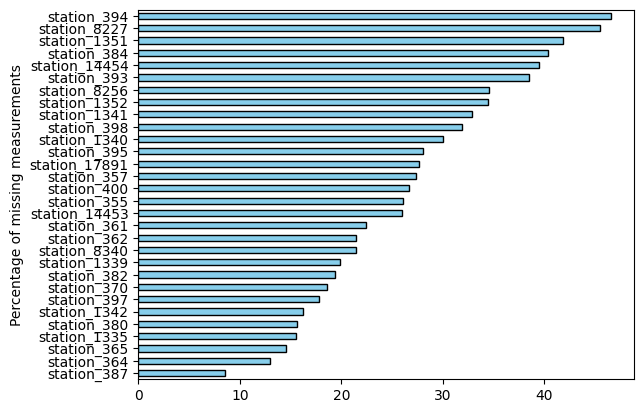

In [63]:

plt.figure(figsize=(8,14))
plt.show()
plt.xlabel('River Station')
plt.ylabel('Percentage of missing measurements')
missing_rows_data_rivers['pct_missing'].sort_values().plot(kind='barh', color='skyblue', edgecolor='black')

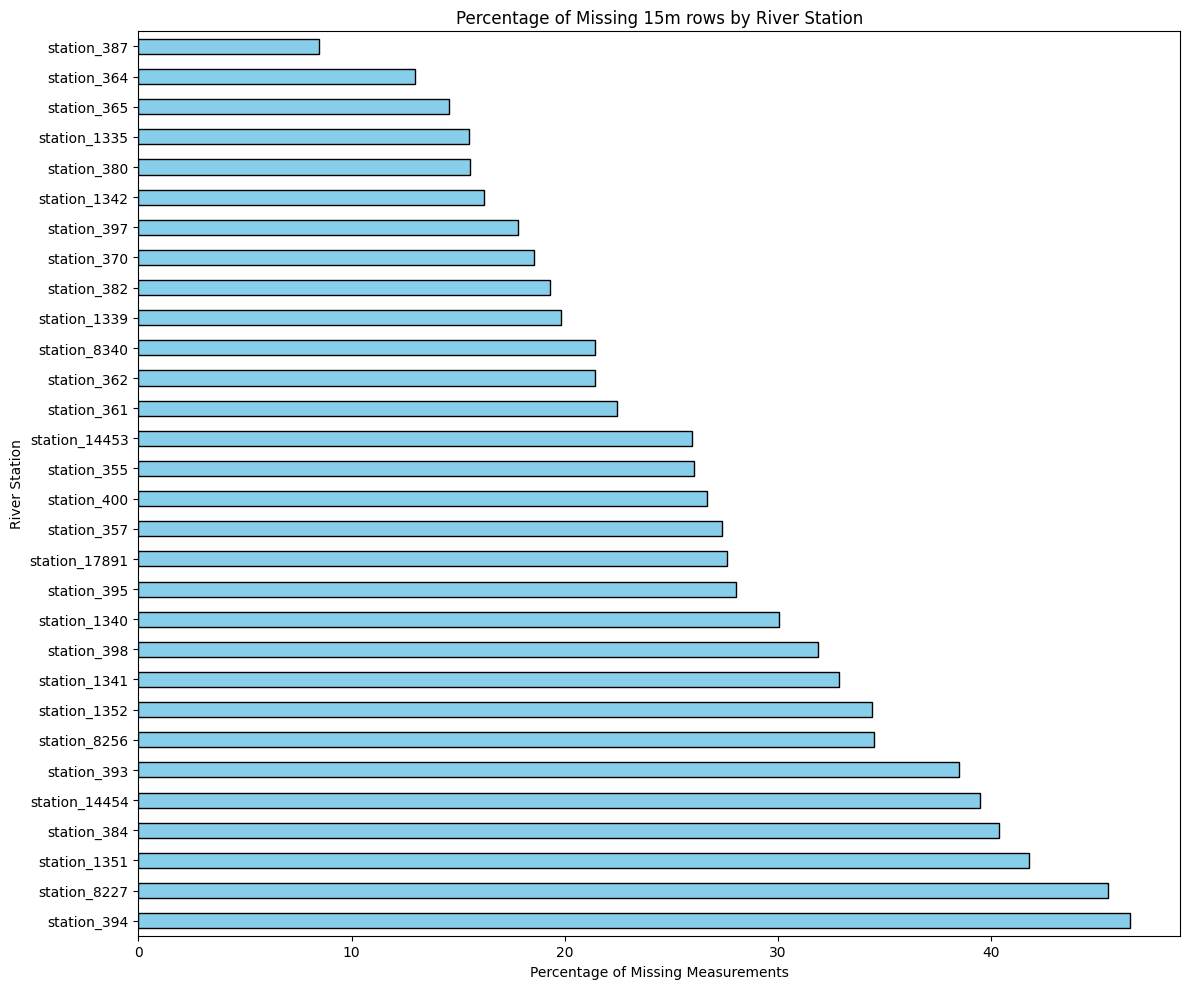

In [67]:
df_sorted = missing_rows_data_rivers['pct_missing'].sort_values()
# Plot
plt.figure(figsize=(12, 10))  # Increase figure size for clarity
df_sorted.plot(kind='barh', color='skyblue', edgecolor='black')  # Horizontal bar plot with color

# Customize the plot
plt.xlabel('Percentage of Missing Measurements')
plt.ylabel('River Station')
plt.title('Percentage of Missing 15m rows by River Station')
plt.gca().invert_yaxis()  # Largest percentage at the top
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [68]:
from src.data_preprocessing import clean_river_csv
import os 

In [ ]:
import os

fine_grained = 'data/river_data/highest_granularity'
clean_directory = os.path.join(fine_grained, 'cleaned')


# Ensure the clean directory exists
os.makedirs(clean_directory, exist_ok=True)

# Iterate over files in fine_grained directory
for gauge in os.listdir(fine_grained):
    # Check if the file has the expected '_raw.csv' suffix
    if gauge.endswith('_raw.csv'):
        # Full path for reading the raw file
        gauge_path = os.path.join(fine_grained, gauge)
        
        # Clean the gauge data
        _, cleaned_gauge = clean_river_csv(gauge_path)
        
        # Save the cleaned data to the clean directory with modified filename
        cleaned_gauge.to_csv(
            os.path.join(clean_directory, gauge.replace("_raw", "_cleaned")),
            index=True
        )



Processing file: data/river_data/highest_granularity/station_355_raw.csv
Rows dropped due to unparseable 'time' values: 0 (0.00%)
The resampling to 15 created 80927 rows corresponding to missing timestamps
Total missing 15-minute rows: 80927 (26.06%)

Negative values replaced and missing values filled using linear interpolation.


Processing file: data/river_data/highest_granularity/station_1340_raw.csv
Rows dropped due to unparseable 'time' values: 0 (0.00%)
The resampling to 15 created 93296 rows corresponding to missing timestamps
Total missing 15-minute rows: 93296 (30.04%)

Negative values replaced and missing values filled using linear interpolation.


Processing file: data/river_data/highest_granularity/station_387_raw.csv
Rows dropped due to unparseable 'time' values: 0 (0.00%)
The resampling to 15 created 26366 rows corresponding to missing timestamps
Total missing 15-minute rows: 26366 (8.49%)

Negative values replaced and missing values filled using linear interpolation.




In [78]:
import pandas as pd
import os

count = 0
total_size = 0

for file in os.listdir(clean_directory):
    file_path = os.path.join(clean_directory, file)  # Full path to the file
    
    # Update total row count
    count += len(pd.read_csv(file_path))
    
    # Update total file size
    total_size += os.path.getsize(file_path)

# Convert total size from bytes to megabytes for readability
total_size_mb = total_size / (1024 * 1024)

print("Total row count across all files:", count)
print(f"Total data size: {total_size_mb:.2f} MB")


Total row count across all files: 8909186
Total data size: 276.18 MB


In [81]:
import pandas as pd
import os

count = 0
total_size = 0
directory = 'data/weather_data'

for file in os.listdir(directory):
    # Check if the file is a CSV
    if not file.endswith('.csv'):
        print(f"Skipping non-CSV file: {file}")
        continue
    
    file_path = os.path.join(directory, file)  # Full path to the file
    
    try:
        # Skip empty files
        if os.path.getsize(file_path) == 0:
            print(f"Skipping empty file: {file}")
            continue
        
        # Attempt to read the file with UTF-8 encoding
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        # If UTF-8 fails, try reading with ISO-8859-1 encoding
        data = pd.read_csv(file_path, encoding='ISO-8859-1')
    except pd.errors.EmptyDataError:
        # Skip if the file has no columns to parse
        print(f"No data to parse in file: {file}")
        continue
    
    # Update total row count and total file size
    count += len(data)
    total_size += os.path.getsize(file_path)

# Convert total size from bytes to megabytes for readability
total_size_mb = total_size / (1024 * 1024)

print("Total row count across all files:", count)
print(f"Total data size: {total_size_mb:.2f} MB")



Skipping non-CSV file: .DS_Store
Skipping non-CSV file: .gitkeep
Total row count across all files: 2872680
Total data size: 290.84 MB


In [82]:
weather_382 = pd.read_csv('data/weather_data/Helebridge_382_nearest_weather_station_openmeteo.csv')
weather_382.head()

,date,temperature_2m,relative_humidity_2m,rain,pressure_msl,surface_pressure,soil_moisture_0_to_7cm,weather_station_latitude,weather_station_longitude
0,2016-01-01 00:00:00+00:00,5.009,78.101870,0.0,1019.7,1017.69870,0.411,50.790859,-4.483978
1,2016-01-01 01:00:00+00:00,4.359,82.609360,0.0,1019.8,1017.79364,0.410,50.790859,-4.483978
2,2016-01-01 02:00:00+00:00,4.209,85.290474,0.0,1019.9,1017.89230,0.409,50.790859,-4.483978
3,2016-01-01 03:00:00+00:00,4.309,85.301490,0.0,1019.6,1017.59380,0.408,50.790859,-4.483978
4,2016-01-01 04:00:00+00:00,4.509,83.518400,0.0,1018.9,1016.89640,0.407,50.790859,-4.483978


In [83]:
from src.data_preprocessing import check_missing_days_in_csv
check_missing_days_in_csv('data/weather_data/Helebridge_382_nearest_weather_station_openmeteo.csv')

KeyError: 'time'

In [84]:
! pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 759.2 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 625.0/625.0 kB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 3.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 3.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 4.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 5.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.7.0
    Uninstalling pyproj-3.7.0:
      Successfully uninstalled pyproj-3.7.0
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    

In [ ]:
import os
import pandas as pd

# Define the directory with weather station CSVs (relative to project root)
weather_data_directory = 'data/weather_data'

# Create a list to store weather station coordinates
weather_station_coords = []

# Iterate through each file in the weather data directory
for file in os.listdir(weather_data_directory):
    file_path = os.path.join(weather_data_directory, file)
    
    # Only process CSV files
    if file.endswith('.csv'):
        try:
            # Read a small sample from each CSV to get the weather station coordinates
            data = pd.read_csv(file_path, nrows=1)  # Only read the first row
            
            # Extract coordinates if present
            if 'weather_station_latitude' in data.columns and 'weather_station_longitude' in data.columns:
                latitude = data['weather_station_latitude'].iloc[0]
                longitude = data['weather_station_longitude'].iloc[0]
                weather_station_coords.append({'latitude': latitude, 'longitude': longitude})
        
        except Exception as e:
            print(f"Could not process file {file}: {e}")

# Convert the list of coordinates to a DataFrame for easier plotting
weather_station_coords_df = pd.DataFrame(weather_station_coords)

# Display the weather station coordinates to verify
print(weather_station_coords_df.head())


    latitude  longitude
0  50.720562  -4.635895
1  50.861156  -4.491974
2  50.509663  -4.929321
3  50.158169  -5.516632
4  50.158169  -5.359039


In [87]:
weather_station_coords_df

,latitude,longitude
0,50.720562,-4.635895
1,50.861156,-4.491974
2,50.509663,-4.929321
3,50.158169,-5.516632
4,50.158169,-5.359039
5,50.579964,-4.778748
6,50.439365,-4.761902
7,50.369068,-5.070404
8,50.017574,-5.654449
9,50.298767,-5.219666


In [3]:
# Define the directory with weather station CSVs
weather_data_directory = 'data/weather_data'

# Create a list to store weather station details, including station id, name, latitude, and longitude
weather_station_details = []

# Iterate through each file in the weather data directory
for file in os.listdir(weather_data_directory):
    file_path = os.path.join(weather_data_directory, file)
    
    # Only process CSV files
    if file.endswith('.csv'):
        try:
            # Read a small sample from each CSV to get the weather station coordinates
            data = pd.read_csv(file_path, nrows=1)  # Only read the first row
            
            # Extract the weather station coordinates if columns are present
            if 'weather_station_latitude' in data.columns and 'weather_station_longitude' in data.columns:
                latitude = data['weather_station_latitude'].iloc[0]
                longitude = data['weather_station_longitude'].iloc[0]
                
                # Extract river gauge station ID and weather station name from the filename
                # Filename format assumed: Denby_380_nearest_weather_station_openmeteo.csv
                parts = file.split('_')
                station_name = parts[0]  # 'Denby'
                gauge_id = parts[1]  # '380'
                
                # Append extracted details to the list
                weather_station_details.append({
                    'gauge_id': gauge_id,
                    'station_name': station_name,
                    'latitude': latitude,
                    'longitude': longitude
                })
        
        except Exception as e:
            print(f"Could not process file {file}: {e}")

# Convert the list of station details to a DataFrame for easier plotting and inspection
weather_station_details_df = pd.DataFrame(weather_station_details)
we

NameError: name 'os' is not defined

In [2]:
weather_station_details

NameError: name 'weather_station_details' is not defined

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the river station information from the CSV
river_station_info_path = 'data/river_data/river_station_info_cornwall.csv'
river_station_info = pd.read_csv(river_station_info_path)

# Prepare river station information for merging and convert gauge_id to string
river_station_info = river_station_info.rename(columns={'id': 'gauge_id', 'latitude': 'latitude_gauge', 'longitude': 'longitude_gauge'})
river_station_info = river_station_info[['gauge_id', 'latitude_gauge', 'longitude_gauge']]
river_station_info['gauge_id'] = river_station_info['gauge_id'].astype(str)

# Convert your weather_station_details variable to a DataFrame and ensure gauge_id is a string
weather_station_details_df = pd.DataFrame(weather_station_details)
weather_station_details_df['gauge_id'] = weather_station_details_df['gauge_id'].astype(str)

# Merge river station info with weather station details on 'gauge_id'
pairs_df = pd.merge(river_station_info, weather_station_details_df, on='gauge_id', suffixes=('_gauge', '_weather'))

# Prepare data for Plotly visualization by reshaping it
plot_data = []
for _, row in pairs_df.iterrows():
    # Add river gauge info to plot data
    plot_data.append({
        'gauge_id': row['gauge_id'],
        'station_name': f"River Gauge {row['gauge_id']}",
        'latitude': row['latitude_gauge'],
        'longitude': row['longitude_gauge'],
        'type': 'River Gauge'
    })
    # Add weather station info to plot data
    plot_data.append({
        'gauge_id': row['gauge_id'],
        'station_name': row['station_name'],
        'latitude': row['latitude'],
        'longitude': row['longitude'],
        'type': 'Weather Station'
    })

# Convert to DataFrame for plotting
plot_df = pd.DataFrame(plot_data)

# Create the scatter plot for the points
fig = px.scatter_mapbox(plot_df, 
                        lat='latitude', 
                        lon='longitude', 
                        color='type',
                        hover_name='station_name',
                        mapbox_style="carto-positron", 
                        zoom=8, 
                        title="River Gauges and Their Nearest Weather Stations")

# Add lines between each river gauge and its closest weather station
for _, row in pairs_df.iterrows():
    fig.add_trace(go.Scattermapbox(
        lat=[row['latitude_gauge'], row['latitude']],
        lon=[row['longitude_gauge'], row['longitude']],
        mode='lines',
        line=dict(color='gray', width=2),
        showlegend=False
    ))


fig.show(renderer="browser")

# Show plot
fig.show()



NameError: name 'weather_station_details' is not defined

In [95]:
! pip install nbformat --upgrade


In [98]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the river station information from the CSV
river_station_info_path = 'data/river_data/river_station_info_cornwall.csv'
river_station_info = pd.read_csv(river_station_info_path)

# Prepare river station information for merging and convert gauge_id to string
river_station_info = river_station_info.rename(columns={'id': 'gauge_id', 'latitude': 'latitude_gauge', 'longitude': 'longitude_gauge'})
river_station_info = river_station_info[['gauge_id', 'latitude_gauge', 'longitude_gauge']]
river_station_info['gauge_id'] = river_station_info['gauge_id'].astype(str)

# Convert your weather_station_details variable to a DataFrame and ensure gauge_id is a string
weather_station_details_df = pd.DataFrame(weather_station_details)
weather_station_details_df['gauge_id'] = weather_station_details_df['gauge_id'].astype(str)

# Merge river station info with weather station details on 'gauge_id'
pairs_df = pd.merge(river_station_info, weather_station_details_df, on='gauge_id', suffixes=('_gauge', '_weather'))

# Prepare data for Plotly visualization by reshaping it
plot_data = []
for _, row in pairs_df.iterrows():
    # Add river gauge info to plot data
    plot_data.append({
        'gauge_id': row['gauge_id'],
        'station_name': f"River Gauge {row['gauge_id']}",
        'latitude': row['latitude_gauge'],
        'longitude': row['longitude_gauge'],
        'type': 'River Gauge',
        'location': 'River Gauge',
        'station_id': row['gauge_id']
    })
    # Add weather station info to plot data
    plot_data.append({
        'gauge_id': row['gauge_id'],
        'station_name': row['station_name'],
        'latitude': row['latitude'],
        'longitude': row['longitude'],
        'type': 'Weather Station',
        'location': 'Weather Station',
        'station_id': row['gauge_id']
    })

# Convert to DataFrame for plotting
plot_df = pd.DataFrame(plot_data)

# Create the scatter plot for the points with tooltips
fig = px.scatter_mapbox(
    plot_df, 
    lat='latitude', 
    lon='longitude', 
    color='type',
    hover_name='station_name',  # Station name as primary hover info
    hover_data={
        'station_id': True,  # Display station_id in tooltip
        'latitude': ':.4f',  # Display latitude to 4 decimal places
        'longitude': ':.4f',  # Display longitude to 4 decimal places
        'location': True  # Add custom location info (River Gauge or Weather Station)
    },
    mapbox_style="carto-positron", 
    zoom=8, 
    title="River Gauges and Their Nearest Weather Stations"
)

# Add lines between each river gauge and its closest weather station
for _, row in pairs_df.iterrows():
    fig.add_trace(go.Scattermapbox(
        lat=[row['latitude_gauge'], row['latitude']],
        lon=[row['longitude_gauge'], row['longitude']],
        mode='lines',
        line=dict(color='gray', width=2),
        showlegend=False
    ))

# Show plot
fig.show(renderer="browser")  # Opens in browser if run outside of Jupyter


In [106]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the river station information from the CSV
river_station_info_path = 'data/river_data/river_station_info_cornwall.csv'
river_station_info = pd.read_csv(river_station_info_path)

# Prepare river station information for merging and convert gauge_id to string
river_station_info = river_station_info.rename(columns={'id': 'gauge_id', 'latitude': 'latitude_gauge', 'longitude': 'longitude_gauge'})
river_station_info = river_station_info[['gauge_id', 'latitude_gauge', 'longitude_gauge']]
river_station_info['gauge_id'] = river_station_info['gauge_id'].astype(str)

# Convert your weather_station_details variable to a DataFrame and ensure gauge_id is a string
weather_station_details_df = pd.DataFrame(weather_station_details)
weather_station_details_df['gauge_id'] = weather_station_details_df['gauge_id'].astype(str)

# Merge river station info with weather station details on 'gauge_id'
pairs_df = pd.merge(river_station_info, weather_station_details_df, on='gauge_id', suffixes=('_gauge', '_weather'))

# Prepare data for Plotly visualization by reshaping it
plot_data = []
for _, row in pairs_df.iterrows():
    # Add river gauge info to plot data with text label for station_id
    plot_data.append({
        'gauge_id': row['gauge_id'],
        'station_name': f"River Gauge {row['gauge_id']}",
        'latitude': row['latitude_gauge'],
        'longitude': row['longitude_gauge'],
        'type': 'River Gauge',
        'text': row['gauge_id'],  # Display gauge ID as text label only for river gauges
        'location': 'River Gauge'
    })
    # Add weather station info to plot data (without text label)
    plot_data.append({
        'gauge_id': row['gauge_id'],
        'station_name': row['station_name'],
        'latitude': row['latitude'],
        'longitude': row['longitude'],
        'type': 'Weather Station',
        'text': '',  # No text label for weather stations
        'location': 'Weather Station'
    })

# Convert to DataFrame for plotting
plot_df = pd.DataFrame(plot_data)

# Plot using Plotly with a wider zoom and smaller text size
fig = px.scatter_mapbox(
    plot_df,
    lat='latitude',
    lon='longitude',
    color='type',
    hover_name='station_name',
    hover_data={
        'gauge_id': True,
        'latitude': ':.4f',
        'longitude': ':.4f',
        'location': True
    },
    text='text',  # Show gauge ID text on river gauges
    mapbox_style="carto-positron",
    zoom=6,  # Wider zoom to reduce overlap
    title="River Gauges and Their Nearest Weather Stations"
)

# Update text display to improve readability
fig.update_traces(textposition="top right", textfont=dict(size=16))

# Add lines between each river gauge and its closest weather station
for _, row in pairs_df.iterrows():
    fig.add_trace(go.Scattermapbox(
        lat=[row['latitude_gauge'], row['latitude']],
        lon=[row['longitude_gauge'], row['longitude']],
        mode='lines',
        line=dict(color='gray', width=2),
        showlegend=False
    ))

# Show plot
fig.show(renderer="browser")  # Opens in browser if running outside Jupyter


In [5]:
from src.data_preprocessing import ridiculous_values_river
import os
import pandas as pd

In [6]:
ridiculous_values_report = {}
for file in os.listdir('data/river_data'):
    if file.endswith('_raw.csv'):
        data = pd.read_csv(os.path.join('data/river_data',file))
        ridiculous_values_report[file] = ridiculous_values_river(data)


Ridiculous values from df:
                       time   value
115899  2019-04-09 12:00:00  -0.606
121953  2019-07-24 03:30:00 -32.768
121954  2019-07-24 04:15:00 -32.768
121957  2019-07-24 15:15:00 -32.768
121958  2019-07-24 16:00:00 -32.768
...                     ...     ...
159284  2021-01-11 11:15:00  -0.572
162582  2021-03-05 15:15:00  -0.547
162583  2021-03-05 15:30:00  -0.546
162584  2021-03-05 15:45:00  -0.547
162585  2021-03-05 16:00:00  -0.541

[72 rows x 2 columns]
Number of ridiculous values: 72
Percentage of ridiculous values: 0.03%
Ridiculous values from df:
                       time  value
83819   2017-03-07 11:15:00 -0.695
83820   2017-03-08 08:45:00 -0.695
105130  2018-01-07 06:15:00  3.236
105131  2018-01-07 06:30:00  3.236
179984  2021-08-04 08:45:00  0.692
179985  2021-08-04 09:00:00  0.692
Number of ridiculous values: 6
Percentage of ridiculous values: 0.00%
Ridiculous values from df:
                      time  value
53282  2016-07-19 12:30:00 -0.008
53283  201

In [10]:
ridiculous_values_report

{'station_355_raw.csv': (                       time  value
  0       2014-03-04 04:15:00  0.429
  1       2014-03-04 04:45:00  0.427
  2       2014-03-04 05:00:00  0.428
  3       2014-03-04 05:15:00  0.427
  4       2014-03-04 05:30:00  0.428
  ...                     ...    ...
  244100  2024-07-11 20:45:00  0.269
  244101  2024-07-11 22:45:00  0.269
  244102  2024-07-11 23:00:00  0.270
  244103  2024-07-11 23:30:00  0.270
  244104  2024-07-11 23:45:00  0.271
  
  [244105 rows x 2 columns],
  72,
  0.029495503983941334),
 'station_1340_raw.csv': (                       time  value
  0       2014-03-04 06:15:00  0.152
  1       2014-03-04 06:30:00  0.155
  2       2014-03-04 06:45:00  0.150
  3       2014-03-04 07:00:00  0.151
  4       2014-03-04 07:15:00  0.149
  ...                     ...    ...
  244186  2024-07-11 19:00:00  0.084
  244187  2024-07-11 19:15:00  0.084
  244188  2024-07-11 19:30:00  0.083
  244189  2024-07-11 19:45:00  0.084
  244190  2024-07-11 23:45:00  0.084
  

In [116]:
ridiculous_values_report.keys()

dict_keys(['station_355_raw.csv', 'station_1340_raw.csv', 'station_387_raw.csv', 'station_397_raw.csv', 'station_1351_raw.csv', 'station_1341_raw.csv', 'station_362_raw.csv', 'station_8227_raw.csv', 'station_384_raw.csv', 'station_394_raw.csv', 'station_400_raw.csv', 'station_370_raw.csv', 'station_14454_raw.csv', 'station_357_raw.csv', 'station_1339_raw.csv', 'station_17891_raw.csv', 'station_395_raw.csv', 'station_1352_raw.csv', 'station_1342_raw.csv', 'station_361_raw.csv', 'station_8256_raw.csv', 'station_364_raw.csv', 'station_1335_raw.csv', 'station_380_raw.csv', 'station_8340_raw.csv', 'station_398_raw.csv', 'station_365_raw.csv', 'station_14453_raw.csv', 'station_393_raw.csv', 'station_382_raw.csv'])

In [21]:
ridiculous_values_report = ridiculous_values_report.rename(columns={0: 'ridic_vals', 1: 'number_ridiculous_values', 2: 'pct_ridiculous_values'})


In [27]:
ridiculous_values_report.drop('ridic_vals', axis=1, inplace=True)

In [30]:
ridiculous_values_report.to_csv('data/river_data/highest_granularity/ridiculous_values_report.csv')

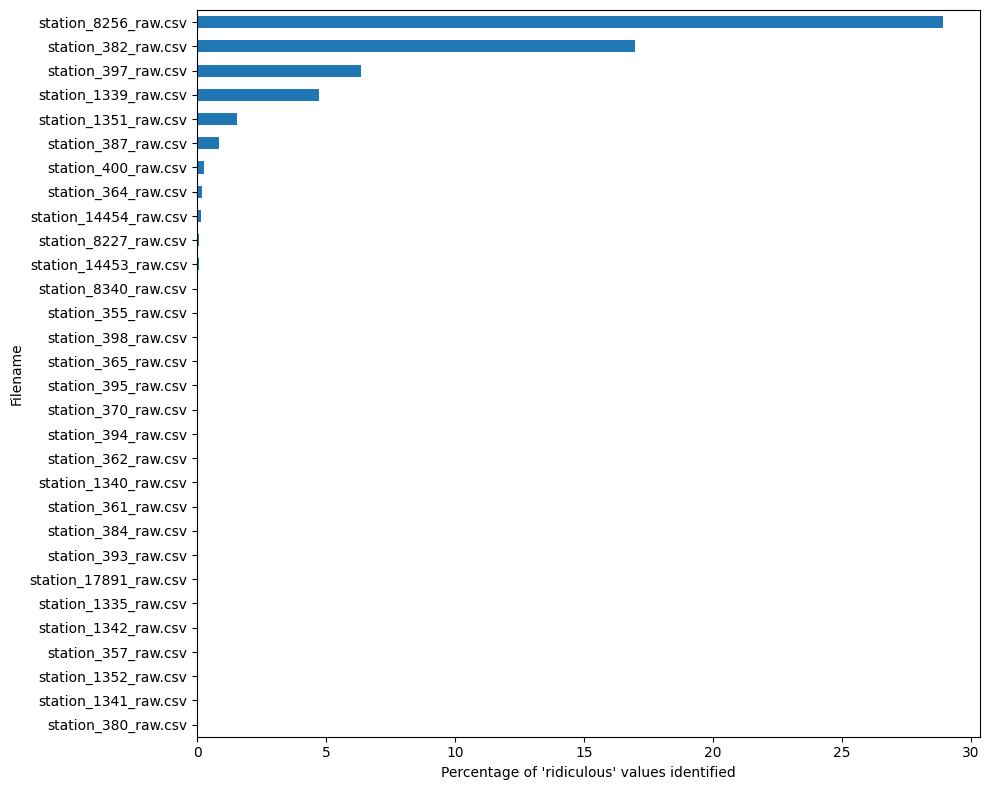

In [41]:
import pandas as pd
import matplotlib.pyplot as plt



# Sort and plot
plt.figure(figsize=(10, 8))
ax = ridiculous_values_report.sort_values(by="pct_ridiculous_values")['pct_ridiculous_values'].plot(kind='barh')
ax.set_xlabel("Percentage of 'ridiculous' values identified")  # Set x-label directly on the axis
ax.set_ylabel("Filename")  # Set y-label directly on the axis

plt.tight_layout()  # Adjusts plot to fit everything within the figure area
plt.show()


In [45]:
river_8256_cleaned

,time,value
0,2016-01-01 00:00:00+00:00,0.332
1,2016-01-01 00:15:00+00:00,0.336
2,2016-01-01 00:30:00+00:00,0.333
3,2016-01-01 00:45:00+00:00,0.342
4,2016-01-01 01:00:00+00:00,0.335
...,...,...
276780,2023-11-23 03:00:00+00:00,0.551
276781,2023-11-23 03:15:00+00:00,0.559
276782,2023-11-23 03:30:00+00:00,0.552
276783,2023-11-23 03:45:00+00:00,0.548


In [46]:
ridiculous_values_river(river_8256_cleaned)

Ridiculous values from df:
Empty DataFrame
Columns: [time, value]
Index: []
Number of ridiculous values: 0
Percentage of ridiculous values: 0.00%


(                             time  value
 0       2016-01-01 00:00:00+00:00  0.332
 1       2016-01-01 00:15:00+00:00  0.336
 2       2016-01-01 00:30:00+00:00  0.333
 3       2016-01-01 00:45:00+00:00  0.342
 4       2016-01-01 01:00:00+00:00  0.335
 ...                           ...    ...
 276780  2023-11-23 03:00:00+00:00  0.551
 276781  2023-11-23 03:15:00+00:00  0.559
 276782  2023-11-23 03:30:00+00:00  0.552
 276783  2023-11-23 03:45:00+00:00  0.548
 276784  2023-11-23 04:00:00+00:00  0.555
 
 [276785 rows x 2 columns],
 0,
 0.0)

In [ ]:
river_8256 = pd.read_csv

NameError: name 'river_8256' is not defined

In [57]:
ridiculous_values_report_cleaned = {}
for file in os.listdir('data/river_data/highest_granularity/cleaned/'):
    if file.endswith('_cleaned.csv'):
        data = pd.read_csv(os.path.join('data/river_data/highest_granularity/cleaned/',file))
        ridiculous_values_report_cleaned[file] = ridiculous_values_river(data)

Ridiculous values from df:
                            time  value
3500   2016-02-06 11:00:00+00:00  0.989
3501   2016-02-06 11:15:00+00:00  1.043
3502   2016-02-06 11:30:00+00:00  1.126
3503   2016-02-06 11:45:00+00:00  1.188
3504   2016-02-06 12:00:00+00:00  1.249
3505   2016-02-06 12:15:00+00:00  1.228
3506   2016-02-06 12:30:00+00:00  1.158
3507   2016-02-06 12:45:00+00:00  1.003
77167  2018-03-14 19:45:00+00:00  0.959
77168  2018-03-14 20:00:00+00:00  1.017
77169  2018-03-14 20:15:00+00:00  1.047
77170  2018-03-14 20:30:00+00:00  1.032
77171  2018-03-14 20:45:00+00:00  0.964
Number of ridiculous values: 13
Percentage of ridiculous values: 0.00%
Ridiculous values from df:
                             time  value
223     2016-01-03 07:45:00+00:00  0.460
49157   2017-05-27 01:15:00+00:00  0.582
49158   2017-05-27 01:30:00+00:00  0.806
64930   2017-11-07 08:30:00+00:00  0.683
64931   2017-11-07 08:45:00+00:00  0.535
...                           ...    ...
173891  2020-12-16 08:45:00+

In [59]:
ridiculous_values_report_cleaned_df = pd.DataFrame(ridiculous_values_report_cleaned).T

In [61]:
ridiculous_values_report_cleaned_df.drop(0,axis=1, inplace=True)
ridiculous_values_report_cleaned_df.rename(columns={1:'ridiculous_values_count', 2: 'ridiculous_values_pct'}, inplace=True)

In [63]:
ridiculous_values_report_cleaned_df

,ridiculous_values_count,ridiculous_values_pct
station_355_cleaned.csv,13,0.004186
station_1351_cleaned.csv,299,0.096264
station_393_cleaned.csv,8,0.002576
station_1341_cleaned.csv,0,0.0
station_8256_cleaned.csv,0,0.0
station_14453_cleaned.csv,201,0.064717
station_362_cleaned.csv,2,0.000644
station_380_cleaned.csv,0,0.0
station_17891_cleaned.csv,0,0.0
station_361_cleaned.csv,7,0.002254


In [64]:
station_14453_cleaned = pd.read_csv('data/river_data/highest_granularity/cleaned/station_14453_cleaned.csv')

In [65]:
station_14453_cleaned['value'].max()

3.053

In [66]:
station_14453_cleaned.describe()

,value
count,310585.000000
mean,0.118621
std,0.108201
min,0.000000
25%,0.060000
50%,0.084000
75%,0.135000
max,3.053000


In [67]:
ridiculous_values_river(station_14453_cleaned)

Ridiculous values from df:
                             time  value
77      2016-01-01 19:15:00+00:00  1.224
224     2016-01-03 08:00:00+00:00  1.436
225     2016-01-03 08:15:00+00:00  1.425
226     2016-01-03 08:30:00+00:00  1.400
227     2016-01-03 08:45:00+00:00  1.381
...                           ...    ...
288734  2024-03-26 15:30:00+00:00  3.053
288736  2024-03-26 16:00:00+00:00  3.053
288737  2024-03-26 16:15:00+00:00  3.053
288738  2024-03-26 16:30:00+00:00  3.053
288739  2024-03-26 16:45:00+00:00  3.053

[201 rows x 2 columns]
Number of ridiculous values: 201
Percentage of ridiculous values: 0.06%


(                             time  value
 0       2016-01-01 00:00:00+00:00  0.295
 1       2016-01-01 00:15:00+00:00  0.302
 2       2016-01-01 00:30:00+00:00  0.297
 3       2016-01-01 00:45:00+00:00  0.296
 4       2016-01-01 01:00:00+00:00  0.292
 ...                           ...    ...
 310580  2024-11-09 05:00:00+00:00  0.122
 310581  2024-11-09 05:15:00+00:00  0.122
 310582  2024-11-09 05:30:00+00:00  0.124
 310583  2024-11-09 05:45:00+00:00  0.126
 310584  2024-11-09 06:00:00+00:00  0.122
 
 [310585 rows x 2 columns],
 201,
 0.06471658322198431)

In [68]:
import os

# Specify the directory
directory = 'data/weather_data/'

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file is a CSV
    if filename.endswith('.csv'):
        # Construct old and new file paths
        old_path = os.path.join(directory, filename)
        new_filename = filename.replace('.csv', '_raw.csv')
        new_path = os.path.join(directory, new_filename)
        
        # Rename the file
        os.rename(old_path, new_path)
        print(f'Renamed {filename} to {new_filename}')


Renamed BOSCASTLE ANDERTON FORD_8256_nearest_weather_station_openmeteo.csv to BOSCASTLE ANDERTON FORD_8256_nearest_weather_station_openmeteo_raw.csv
Renamed Bude_399_nearest_weather_station_openmeteo.csv to Bude_399_nearest_weather_station_openmeteo_raw.csv
Renamed Denby_380_nearest_weather_station_openmeteo.csv to Denby_380_nearest_weather_station_openmeteo_raw.csv
Renamed Penzance Tesco_1342_nearest_weather_station_openmeteo.csv to Penzance Tesco_1342_nearest_weather_station_openmeteo_raw.csv
Renamed Hayle Tideflap_358_nearest_weather_station_openmeteo.csv to Hayle Tideflap_358_nearest_weather_station_openmeteo_raw.csv
Renamed Penvose_387_nearest_weather_station_openmeteo.csv to Penvose_387_nearest_weather_station_openmeteo_raw.csv
Renamed Bodmin St Petrocs Well_1351_nearest_weather_station_openmeteo.csv to Bodmin St Petrocs Well_1351_nearest_weather_station_openmeteo_raw.csv
Renamed Gwills_394_nearest_weather_station_openmeteo.csv to Gwills_394_nearest_weather_station_openmeteo_raw.

In [ ]:
# MCAR? 

In [ ]:
! pip install missingno
import missingno as msno
import matplotlib.pyplot as plt




NameError: name 'df_15min' is not defined

In [82]:
df_15min = pd.read_csv('data/river_data/highest_granularity/station_1341_raw.csv')

In [83]:
df_15min['time'] = pd.to_datetime(df_15min['time'])
df_15min.set_index('time', inplace=True)
df_15min = df_15min.asfreq('15min')

In [84]:
df_15min

,value
time,
2016-01-01 00:00:00,0.120
2016-01-01 00:15:00,0.122
2016-01-01 00:30:00,0.126
2016-01-01 00:45:00,0.123
2016-01-01 01:00:00,0.121
...,...
2024-11-09 05:00:00,0.125
2024-11-09 05:15:00,0.124
2024-11-09 05:30:00,0.125


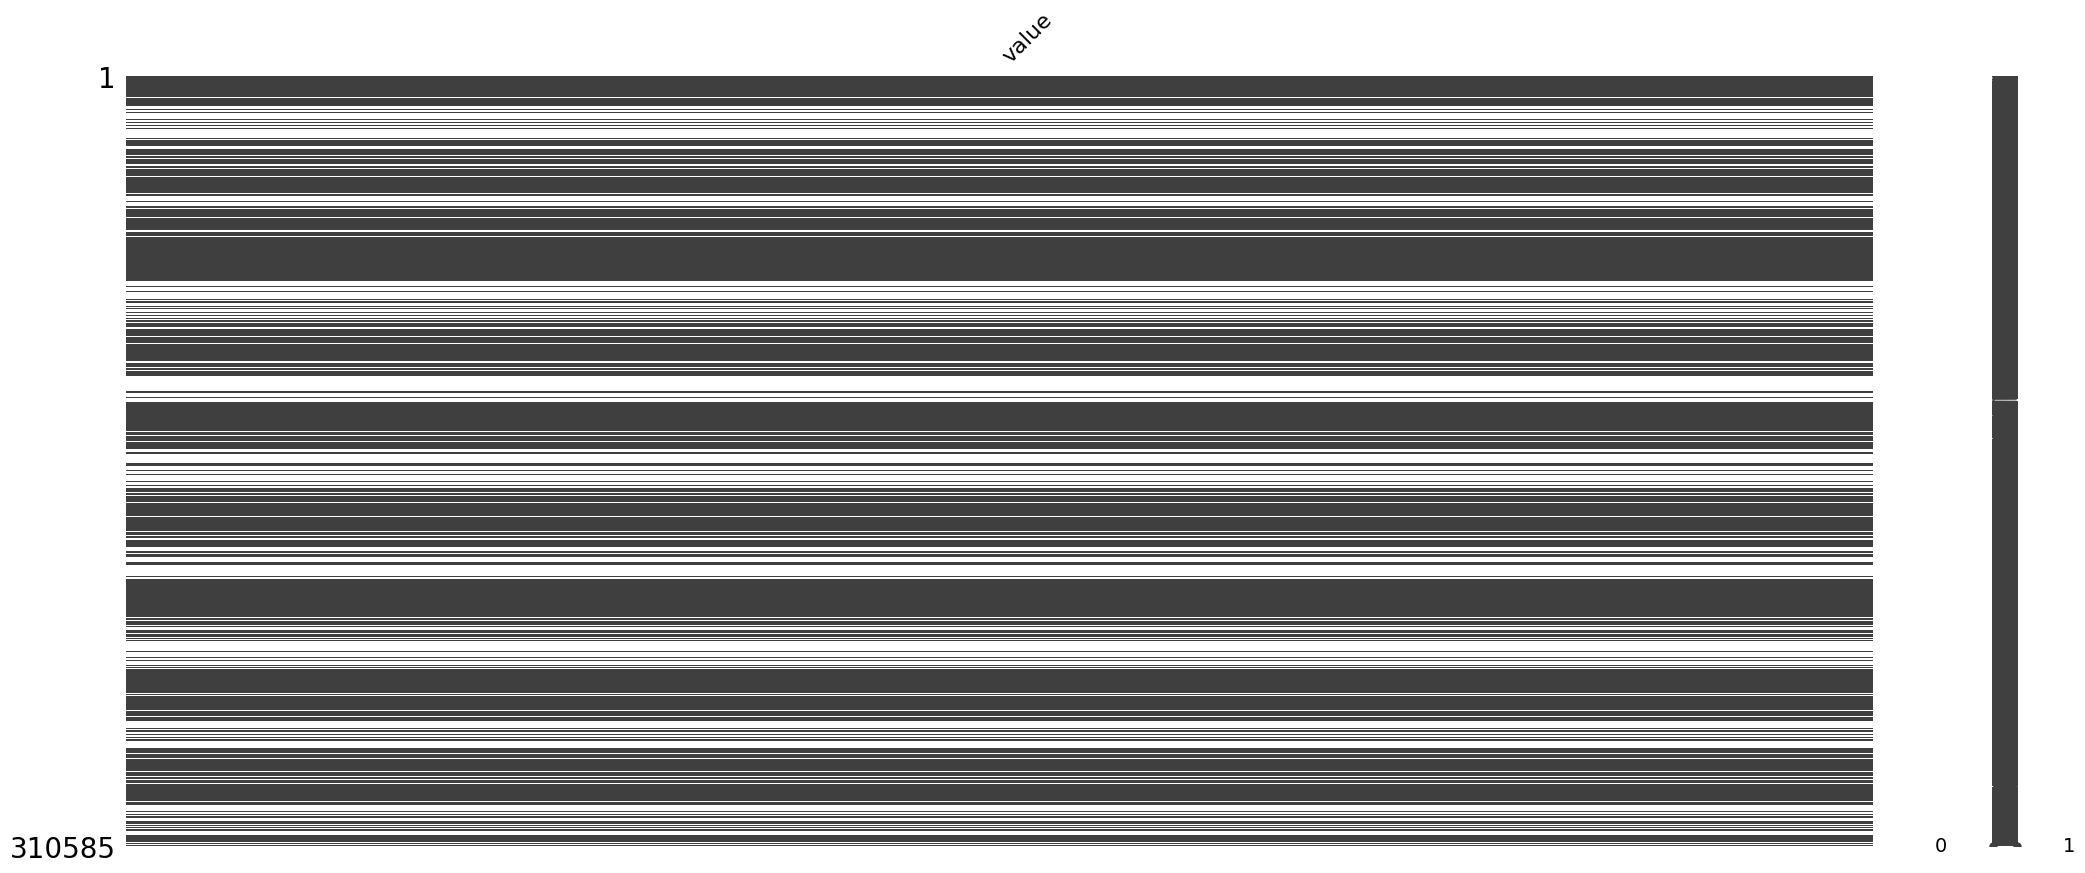

In [85]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df_15min)  # Visualize missing data pattern
plt.show()

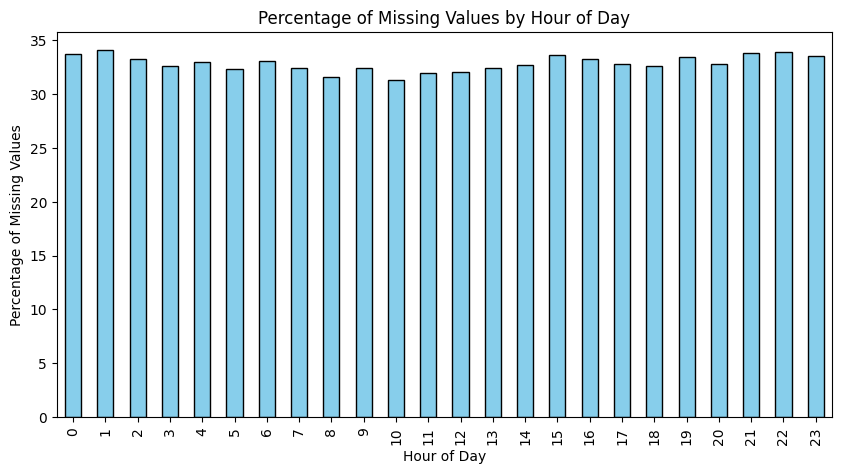

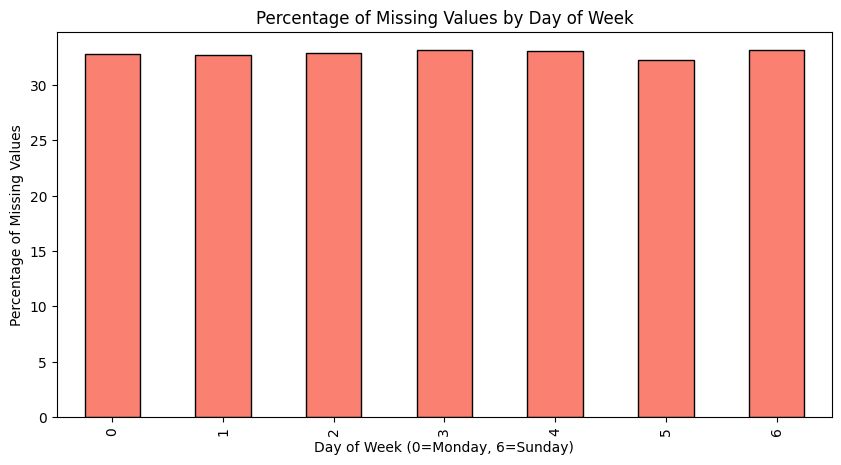

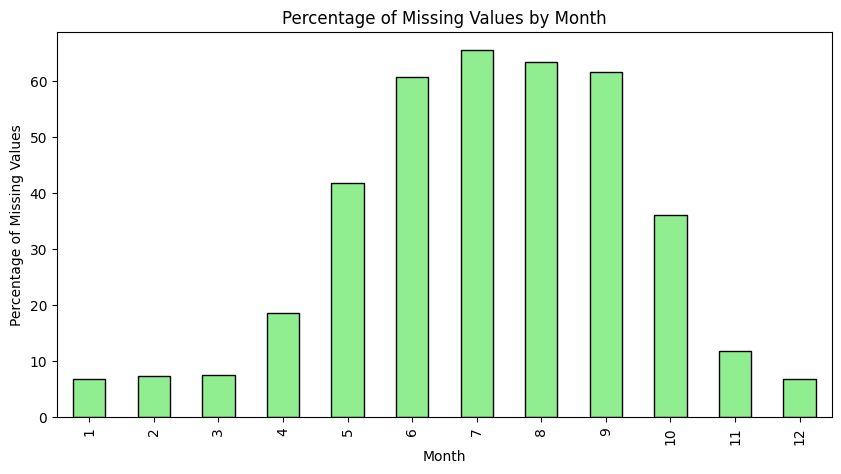

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_15min['missing'] = df_15min['value'].isnull().astype(int)  # Create a binary column indicating missing values

# Missing values by hour of the day
missing_by_hour = df_15min.groupby(df_15min.index.hour)['missing'].mean() * 100
plt.figure(figsize=(10, 5))
missing_by_hour.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Percentage of Missing Values by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Percentage of Missing Values")
plt.show()

# Missing values by day of the week
missing_by_day = df_15min.groupby(df_15min.index.dayofweek)['missing'].mean() * 100
plt.figure(figsize=(10, 5))
missing_by_day.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Percentage of Missing Values by Day of Week")
plt.xlabel("Day of Week (0=Monday, 6=Sunday)")
plt.ylabel("Percentage of Missing Values")
plt.show()

# Missing values by month
missing_by_month = df_15min.groupby(df_15min.index.month)['missing'].mean() * 100
plt.figure(figsize=(10, 5))
missing_by_month.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Percentage of Missing Values by Month")``
plt.xlabel("Month")
plt.ylabel("Percentage of Missing Values")
plt.show()


In [91]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def visualize_missing_patterns_bulk(directory: str, output_dir: str, value_column: str = 'value'):
    """
    Generates and saves missing data pattern visualizations for all CSV files in a directory after resampling to 15-minute intervals.

    Parameters:
    - directory: str - The directory containing the CSV files.
    - output_dir: str - The directory where plots will be saved.
    - value_column: str - The column name for the data values to check for missing values (default is 'value').
    """
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Loop through all CSV files in the directory
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            csv_path = os.path.join(directory, filename)
            
            # Load data
            try:
                df = pd.read_csv(csv_path, parse_dates=['time'], index_col='time')
            except Exception as e:
                print(f"Error reading {filename}: {e}")
                continue
            
            # Ensure 'value' column exists
            if value_column not in df.columns:
                print(f"Column '{value_column}' not found in {filename}")
                continue

            # Resample to 15-minute frequency and fill missing timestamps with NaN
            df_resampled = df.asfreq('15min')
            
            # Check for missing values in the resampled data
            missing_count = df_resampled[value_column].isnull().sum()
            if missing_count == 0:
                print(f"No missing values found in resampled data for {filename}. Skipping...")
                continue
            
            print(f"Processing {filename} with {missing_count} missing values after resampling.")

            # Create missing value indicator
            df_resampled['missing'] = df_resampled[value_column].isnull().astype(int)
            
            # Generate and save plots for missing values by hour, day, and month
            plt.figure(figsize=(10, 5))
            missing_by_hour = df_resampled.groupby(df_resampled.index.hour)['missing'].mean() * 100
            missing_by_hour.plot(kind='bar', color='skyblue', edgecolor='black')
            plt.title(f"Percentage of Missing Values by Hour of Day - {filename}")
            plt.xlabel("Hour of Day")
            plt.ylabel("Percentage of Missing Values")
            plt.savefig(os.path.join(output_dir, f"{filename}_missing_by_hour.png"))
            plt.close()

            plt.figure(figsize=(10, 5))
            missing_by_day = df_resampled.groupby(df_resampled.index.dayofweek)['missing'].mean() * 100
            missing_by_day.plot(kind='bar', color='salmon', edgecolor='black')
            plt.title(f"Percentage of Missing Values by Day of Week - {filename}")
            plt.xlabel("Day of Week (0=Monday, 6=Sunday)")
            plt.ylabel("Percentage of Missing Values")
            plt.savefig(os.path.join(output_dir, f"{filename}_missing_by_day.png"))
            plt.close()

            plt.figure(figsize=(10, 5))
            missing_by_month = df_resampled.groupby(df_resampled.index.month)['missing'].mean() * 100
            missing_by_month.plot(kind='bar', color='lightgreen', edgecolor='black')
            plt.title(f"Percentage of Missing Values by Month - {filename}")
            plt.xlabel("Month")
            plt.ylabel("Percentage of Missing Values")
            plt.savefig(os.path.join(output_dir, f"{filename}_missing_by_month.png"))
            plt.close()

            print(f"Plots saved for {filename}")

# Example usage:
# visualize_missing_patterns_bulk('data/river_data', 'output/missing_patterns')


In [92]:
visualize_missing_patterns_bulk('data/river_data','data/river_data/plots/' )

Processing station_355_raw.csv with 119046 missing values after resampling.
Plots saved for station_355_raw.csv
Processing station_1340_raw.csv with 118952 missing values after resampling.
Plots saved for station_1340_raw.csv
Processing station_387_raw.csv with 63356 missing values after resampling.
Plots saved for station_387_raw.csv
Processing station_397_raw.csv with 90417 missing values after resampling.
Plots saved for station_397_raw.csv
Processing station_1351_raw.csv with 160950 missing values after resampling.
Plots saved for station_1351_raw.csv
Processing station_1341_raw.csv with 124616 missing values after resampling.
Plots saved for station_1341_raw.csv
Processing station_362_raw.csv with 106945 missing values after resampling.
Plots saved for station_362_raw.csv
Processing station_8227_raw.csv with 263918 missing values after resampling.
Plots saved for station_8227_raw.csv
Processing station_384_raw.csv with 169553 missing values after resampling.
Plots saved for statio

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

directory = 'data/river_data'


def analyze_seasonal_missingness(directory, value_column='value'):
    monthly_missing = []
    
    for filename in os.listdir(directory):
        if filename.endswith('_raw.csv'):
            # Load and resample data
            df = pd.read_csv(os.path.join(directory, filename), parse_dates=['time'], index_col='time')
            df_resampled = df.asfreq('15min')
            df_resampled['missing'] = df_resampled[value_column].isnull().astype(int)

            # Calculate monthly missingness percentage
            monthly_missing_df = df_resampled['missing'].groupby(df_resampled.index.month).mean() * 100
            monthly_missing_df = monthly_missing_df.rename(filename)
            monthly_missing.append(monthly_missing_df)
    
    # Concatenate monthly missing percentages across all files
    monthly_missing_combined = pd.concat(monthly_missing, axis=1)
    monthly_mean_missing = monthly_missing_combined.mean(axis=1)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=monthly_mean_missing, marker='o', color='b')
    plt.title('Average Percentage of Missing Values by Month')
    plt.xlabel('Month')
    plt.ylabel('Average Percentage of Missing Values')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()


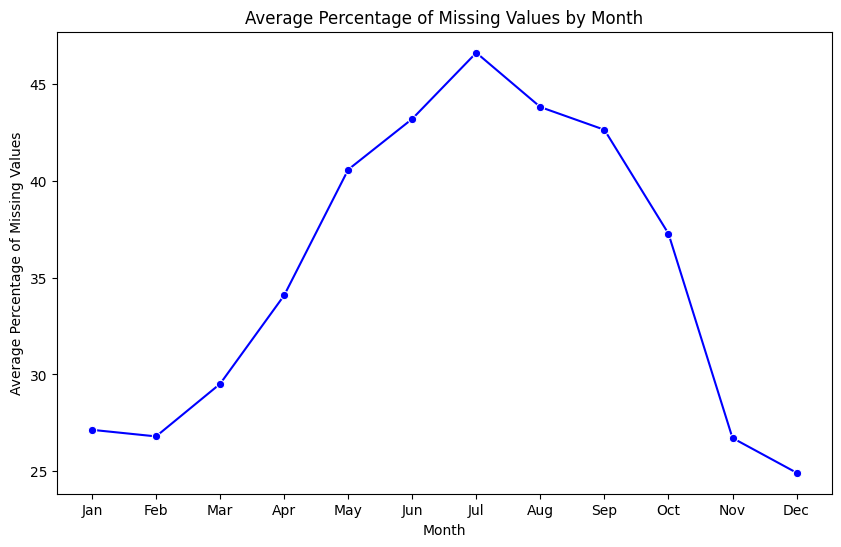

In [98]:
analyze_seasonal_missingness(directory=directory,value_column='value')

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

def save_loess_plots(directory, output_dir, frac=0.1, max_plots=None):
    """
    Apply LOESS smoothing to each river gauge CSV file in a directory and save the plots.

    Parameters:
    - directory: str, path to the directory containing river gauge CSV files.
    - output_dir: str, path to the directory where the plots will be saved.
    - frac: float, the fraction of data to use for LOESS smoothing. Default is 0.1.
    - max_plots: int or None, maximum number of plots to generate. Set to None for all files.
    """
    
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)
    
    plot_count = 0
    for filename in os.listdir(directory):
        if filename.endswith('_raw.csv'):
            file_path = os.path.join(directory, filename)
            
            # Load the data
            df = pd.read_csv(file_path, parse_dates=['time'], index_col='time')
            
            # Ensure data is resampled to fill missing timestamps at 15min intervals
            df = df.asfreq('15min')
            
            # Check if 'value' column exists
            if 'value' not in df.columns:
                print(f"Column 'value' not found in {filename}")
                continue
            
            # Apply LOESS smoothing to the 'value' column
            df['value'] = df['value'].interpolate(method='linear')  # Interpolate to handle NaNs
            loess_smoothed = lowess(df['value'].values, np.arange(len(df)), frac=frac, return_sorted=False)

            # Plot and save as a .png file
            plt.figure(figsize=(12, 6))
            plt.plot(df.index, df['value'], label='Original Data', color='blue', alpha=0.6)
            plt.plot(df.index, loess_smoothed, label='LOESS Smoothed', color='red', linewidth=2)
            plt.title(f"LOESS Smoothing for {filename}")
            plt.xlabel("Time")
            plt.ylabel("River Gauge Value")
            plt.legend()
            
            # Save the plot
            output_path = os.path.join(output_dir, f"{filename}_loess_plot.png")
            plt.savefig(output_path)
            plt.close()  # Close the plot to free memory
            plot_count += 1
            print(f"Plot saved for {filename} at {output_path}")
            
            # Limit the number of plots (optional)
            if max_plots and plot_count >= max_plots:
                print(f"Stopped after generating {max_plots} plots.")
                break

# Example usage in your script:



In [100]:
save_loess_plots('data/river_data/', 'data/river_data/loess_plots/', frac=0.1, max_plots=5)

KeyboardInterrupt: 

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
import os

def test_loess_plot_single_file(file_path, output_dir, frac=0.1):
    """
    Apply LOESS smoothing to a single river gauge CSV file and save the plot.

    Parameters:
    - file_path: str, path to the CSV file for the river gauge.
    - output_dir: str, path to the directory where the plot will be saved.
    - frac: float, the fraction of data to use for LOESS smoothing. Default is 0.1.
    """
    
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)
    
    # Load the data
    try:
        df = pd.read_csv(file_path, parse_dates=['time'], index_col='time')
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")
        return
    
    # Ensure data is resampled to fill missing timestamps at 15min intervals
    df = df.asfreq('15min')
    
    # Check if 'value' column exists
    if 'value' not in df.columns:
        print(f"Column 'value' not found in {file_path}")
        return
    
    # Apply LOESS smoothing to the 'value' column
    df['value'] = df['value'].interpolate(method='linear')  # Interpolate to handle NaNs
    loess_smoothed = lowess(df['value'].values, np.arange(len(df)), frac=frac, return_sorted=False)

    # Plot and save as a .png file
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['value'], label='Original Data', color='blue', alpha=0.6)
    plt.plot(df.index, loess_smoothed, label='LOESS Smoothed', color='red', linewidth=2)
    plt.title(f"LOESS Smoothing for {os.path.basename(file_path)}")
    plt.xlabel("Time")
    plt.ylabel("River Gauge Value")
    plt.legend()
    
    # Save the plot
    output_path = os.path.join(output_dir, f"{os.path.basename(file_path).replace('.csv', '_loess_plot.png')}")
    plt.savefig(output_path)
    plt.close()  # Close the plot to free memory
    print(f"Test plot saved at {output_path}")

# Run the test on station_355_raw.csv
test_loess_plot_single_file('data/river_data/station_355_raw.csv', 'data/river_data/loess_plots/', frac=0.1)


KeyboardInterrupt: 

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
import os

def fast_loess_test(file_path, output_dir, downsample_freq='H', frac=0.05):
    """
    Test LOESS smoothing on downsampled data for faster performance, removing negative values.

    Parameters:
    - file_path: str, path to the CSV file for the river gauge.
    - output_dir: str, path to the directory where the plot will be saved.
    - downsample_freq: str, frequency string for downsampling (e.g., 'H' for hourly, 'D' for daily).
    - frac: float, fraction of data to use for LOESS smoothing. Default is 0.05 for faster performance.
    """
    
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)
    
    # Load the data
    try:
        df = pd.read_csv(file_path, parse_dates=['time'], index_col='time')
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")
        return
    
    # Remove negative values
    df = df[df['value'] >= 0]
    
    # Resample data to fill missing timestamps and downsample
    df = df.asfreq('15min')  # Ensure consistent 15-minute intervals
    df['value'] = df['value'].interpolate(method='linear')
    
    if downsample_freq:
        # Downsample to hourly or daily frequency as specified
        df = df.resample(downsample_freq).mean()
    
    # Apply LOESS smoothing on the downsampled data
    loess_smoothed = lowess(df['value'].values, np.arange(len(df)), frac=frac, return_sorted=False)
    
    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['value'], label='Downsampled Data (Negative values removed)', color='blue', alpha=0.6)
    plt.plot(df.index, loess_smoothed, label='LOESS Smoothed', color='red', linewidth=2)
    plt.title(f"Fast LOESS Smoothing for {os.path.basename(file_path)} (Negative values removed)")
    plt.xlabel("Time")
    plt.ylabel("River Gauge Value")
    plt.legend()
    
    # Save the plot
    output_path = os.path.join(output_dir, f"{os.path.basename(file_path).replace('.csv', '_fast_loess_plot_cleaned.png')}")
    plt.savefig(output_path)
    plt.close()
    print(f"Test plot saved at {output_path}")

# Example usage with a test case
fast_loess_test('data/river_data/station_355_raw.csv', 'data/river_data/loess_plots/', downsample_freq='H', frac=0.05)


/var/folders/4n/18wn5fm9177dpn28hhj4f8w00000gn/T/ipykernel_25862/3143149962.py:37: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample(downsample_freq).mean()


Test plot saved at data/river_data/loess_plots/station_355_raw_fast_loess_plot_cleaned.png


## Flood labels

https://check-for-flooding.service.gov.uk/station/3402

- Part for video, before and after imputing missing values

13 Dec Work for Video on Preprocessing (Missing 15min rows)

In [1]:
import os
os.getcwd()

'/Users/antonfreidin/water_project'

In [2]:
from src.data_visualisation import plot_time_series
from src.data_preprocessing import load_all_river_gauge_csvs, seasonal_impute
import random
import pandas as pd
import os
from src.data_visualisation import visualize_missing_values_rivers, visualize_missing_patterns_bulk

FileNotFoundError: [Errno 2] No such file or directory: 'path_to_your_directory'

In [2]:
all_river_dfs = load_all_river_gauge_csvs('data/river_data/highest_granularity')

In [3]:
df = pd.read_csv('data/river_data/highest_granularity/station_1351_raw.csv')

In [4]:
df.describe()

,value
count,180768.000000
mean,0.070934
std,0.046357
min,-1.277000
25%,0.052000
50%,0.062000
75%,0.079000
max,1.869000


KeyboardInterrupt: 

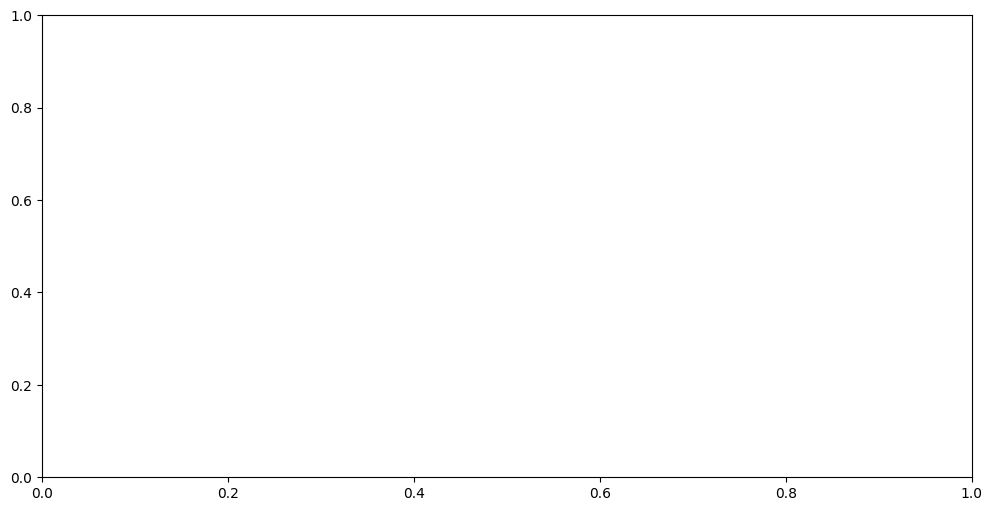

In [13]:
plot_time_series(df, variable='value')

In [5]:
df.loc[df['value']<0]

,time,value
30457,2017-11-20 10:00:00,-0.002
30458,2017-11-20 10:15:00,-0.010
30459,2017-11-20 10:30:00,-0.016
30460,2017-11-20 10:45:00,-0.014
30461,2017-11-20 11:00:00,-0.014
...,...,...
100480,2021-04-01 12:00:00,-0.018
100481,2021-04-01 12:15:00,-0.017
100482,2021-04-01 12:30:00,-0.018
100483,2021-04-01 13:15:00,-0.018


In [15]:
import os
import pandas as pd
import numpy as np

def replace_negatives_with_interpolation(directory, column="value"):
    """
    Replaces negative values in the specified column of CSV files with interpolated values
    from the nearest positive values.

    Parameters:
    - directory: str, path to the directory containing the raw CSV files.
    - column: str, name of the column containing river gauge levels to process.

    Returns:
    - None: Saves the modified CSVs to a folder named 'highest_granularity_rnwi'
            in the parent directory of the provided directory.
    """
    # Define the output directory
    parent_directory = os.path.abspath(os.path.join(directory, os.pardir))
    output_directory = os.path.join(parent_directory, "highest_granularity_rnwi")
    
    # Create the output directory if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)

    for filename in os.listdir(directory):
        if filename.endswith("raw.csv"):
            filepath = os.path.join(directory, filename)
            # Load the CSV file
            df = pd.read_csv(filepath)
            
            # Ensure the column exists in the dataframe
            if column in df.columns:
                # Replace negative values with NaN
                df[column] = df[column].apply(lambda x: np.nan if x < 0 else x)
                
                # Interpolate NaN values using nearest method
                df[column] = df[column].interpolate(method='nearest', limit_direction='both')
                
                # Save the modified dataframe in the output directory
                output_filepath = os.path.join(output_directory, f"{filename}_rnwi.csv")
                df.to_csv(output_filepath, index=False)
            else:
                print(f"Column '{column}' not found in file {filename}. Skipping.")



In [16]:
replace_negatives_with_interpolation('data/river_data/highest_granularity')

In [17]:
len(list(os.listdir('data/river_data/highest_granularity_rnwi')))

30

In [20]:
df[df['value'] <0 ]

,time,value
30457,2017-11-20 10:00:00,-0.002
30458,2017-11-20 10:15:00,-0.010
30459,2017-11-20 10:30:00,-0.016
30460,2017-11-20 10:45:00,-0.014
30461,2017-11-20 11:00:00,-0.014
...,...,...
100480,2021-04-01 12:00:00,-0.018
100481,2021-04-01 12:15:00,-0.017
100482,2021-04-01 12:30:00,-0.018
100483,2021-04-01 13:15:00,-0.018


In [9]:
for file in os.listdir('data/river_data/highest_granularity'):
    if file.endswith('_raw.csv'):
       path = os.path.join('data/river_data/highest_granularity', file)
       df = pd.read_csv(path)
       neg_values_count = len(df[df['value'] < 0])
       print(f'neg values for file, {file}: {neg_values_count}')

neg values for file, station_355_raw.csv: 109
neg values for file, station_1340_raw.csv: 2
neg values for file, station_387_raw.csv: 2546
neg values for file, station_397_raw.csv: 14430
neg values for file, station_1351_raw.csv: 3069
neg values for file, station_1341_raw.csv: 0
neg values for file, station_362_raw.csv: 9
neg values for file, station_8227_raw.csv: 73
neg values for file, station_384_raw.csv: 2
neg values for file, station_394_raw.csv: 8
neg values for file, station_400_raw.csv: 122
neg values for file, station_370_raw.csv: 16
neg values for file, station_14454_raw.csv: 832
neg values for file, station_357_raw.csv: 1
neg values for file, station_1339_raw.csv: 13875
neg values for file, station_17891_raw.csv: 1
neg values for file, station_395_raw.csv: 23
neg values for file, station_1352_raw.csv: 0
neg values for file, station_1342_raw.csv: 0
neg values for file, station_361_raw.csv: 5
neg values for file, station_8256_raw.csv: 54462
neg values for file, station_364_raw.

In [8]:
for file in os.listdir('data/river_data/highest_granularity_rnwi/'):
    if file.endswith('_rnwi.csv'):
       path = os.path.join('data/river_data/highest_granularity_rnwi/', file)
       df = pd.read_csv(path)
       neg_values_count = len(df[df['value'] < 0])
       if neg_values_count:
        print(neg_values_count)
       else:
           print(f'no negative values found for file {file}') 
      

no negative values found for file station_1342_raw.csv_rnwi.csv
no negative values found for file station_400_raw.csv_rnwi.csv
no negative values found for file station_1352_raw.csv_rnwi.csv
no negative values found for file station_395_raw.csv_rnwi.csv
no negative values found for file station_1339_raw.csv_rnwi.csv
no negative values found for file station_357_raw.csv_rnwi.csv
no negative values found for file station_362_raw.csv_rnwi.csv
no negative values found for file station_384_raw.csv_rnwi.csv
no negative values found for file station_14453_raw.csv_rnwi.csv
no negative values found for file station_380_raw.csv_rnwi.csv
no negative values found for file station_394_raw.csv_rnwi.csv
no negative values found for file station_361_raw.csv_rnwi.csv
no negative values found for file station_387_raw.csv_rnwi.csv
no negative values found for file station_398_raw.csv_rnwi.csv
no negative values found for file station_14454_raw.csv_rnwi.csv
no negative values found for file station_393_ra

NOTE : 8256 has the most missing values of all!

In [65]:
gauge_8256 = pd.read_csv('data/river_data/highest_granularity_rnwi/station_8256_raw.csv_rnwi.csv')
gauge_8256_15min = gauge_8256.copy()
gauge_8256_15min['time'] = pd.to_datetime(gauge_8256_15min['time'])
gauge_8256_15min.set_index('time', inplace=True)



In [6]:
def seasonal_impute(df: pd.DataFrame, column: str = 'value') -> pd.DataFrame:
    """
    Impute missing values based on seasonal (monthly and hourly) averages.

    Args:
        df (pd.DataFrame): DataFrame with a datetime index and a column to impute.
        column (str): Name of the column containing the values to impute.

    Returns:
        pd.DataFrame: DataFrame with missing values imputed seasonally.
    """
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")
    
    if df.index.freq is None:
        df = df.asfreq('15min')  # Ensure uniform frequency

    # Calculate monthly-hourly averages (better granularity)
    monthly_hourly_averages = (
        df.groupby([df.index.month, df.index.hour])[column]
        .mean()
        .unstack()
    )

    # Define a helper function to impute using monthly-hourly averages
    def impute(row):
        if pd.isna(row[column]):
            month = row.name.month
            hour = row.name.hour
            return monthly_hourly_averages.loc[month, hour] if (month in monthly_hourly_averages.index and hour in monthly_hourly_averages.columns) else np.nan
        return row[column]

    # Apply the imputation function
    df[column] = df.apply(impute, axis=1)
    return df


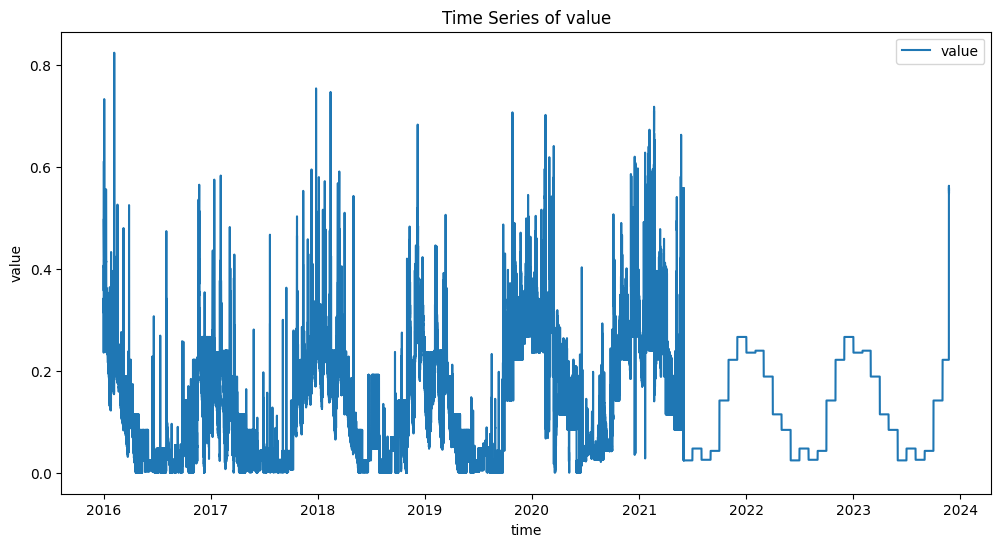

In [52]:
gauge_8256_15min_imputed.reset_index(inplace=True)
plot_time_series(gauge_8256_15min_imputed, variable='value')

In [47]:
gauge_8256_15min_imputed

,time,value
0,2016-01-01 00:00:00,0.332
1,2016-01-01 00:15:00,0.336
2,2016-01-01 00:30:00,0.333
3,2016-01-01 00:45:00,0.342
4,2016-01-01 01:00:00,0.335
...,...,...
276780,2023-11-23 03:00:00,0.551
276781,2023-11-23 03:15:00,0.559
276782,2023-11-23 03:30:00,0.552
276783,2023-11-23 03:45:00,0.548


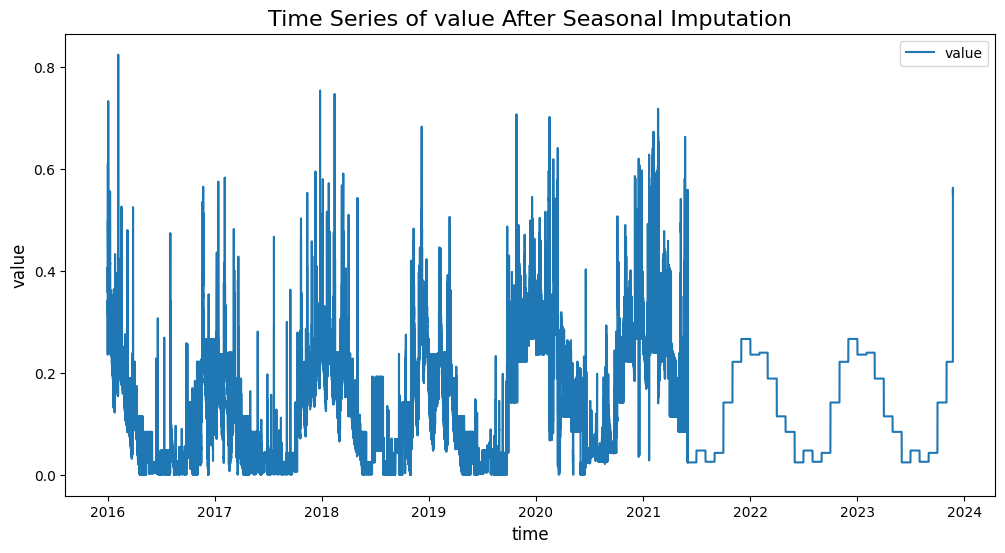

In [53]:
# Impute missing values using the refined function
gauge_8256_15min_imputed = seasonal_impute(gauge_8256_15min, column='value')

# Visualize the time series with imputed values
plt.figure(figsize=(12, 6))
plt.plot(gauge_8256_15min_imputed.index, gauge_8256_15min_imputed['value'], label='value')
plt.title("Time Series of value After Seasonal Imputation", fontsize=16)
plt.xlabel("time", fontsize=12)
plt.ylabel("value", fontsize=12)
plt.legend()
plt.show()


In [54]:
def hybrid_impute(df: pd.DataFrame, column: str = 'value') -> pd.DataFrame:
    """
    Impute missing values using a hybrid approach: forward-fill for short gaps and
    seasonal (monthly-hourly) averages for longer gaps, with added variability.

    Args:
        df (pd.DataFrame): DataFrame with a datetime index and a column to impute.
        column (str): Name of the column containing the values to impute.

    Returns:
        pd.DataFrame: DataFrame with missing values imputed.
    """
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")
    
    if df.index.freq is None:
        df = df.asfreq('15min')  # Ensure uniform frequency

    # Forward-fill for short gaps
    df[column] = df[column].fillna(method='ffill', limit=96)  # Up to 1 day forward-fill

    # Calculate monthly-hourly averages
    monthly_hourly_averages = (
        df.groupby([df.index.month, df.index.hour])[column]
        .mean()
        .unstack()
    )

    # Define a helper function for seasonal imputation
    def seasonal_impute(row):
        if pd.isna(row[column]):
            month = row.name.month
            hour = row.name.hour
            if (month in monthly_hourly_averages.index and hour in monthly_hourly_averages.columns):
                # Add small variability to avoid flat patterns
                base_value = monthly_hourly_averages.loc[month, hour]
                noise = np.random.normal(0, 0.05 * base_value) if not pd.isna(base_value) else 0
                return base_value + noise
        return row[column]

    # Apply seasonal imputation
    df[column] = df.apply(seasonal_impute, axis=1)
    return df


In [56]:
test = hybrid_impute(gauge_8256_15min)

/var/folders/4n/18wn5fm9177dpn28hhj4f8w00000gn/T/ipykernel_45481/2052596054.py:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column] = df[column].fillna(method='ffill', limit=96)  # Up to 1 day forward-fill


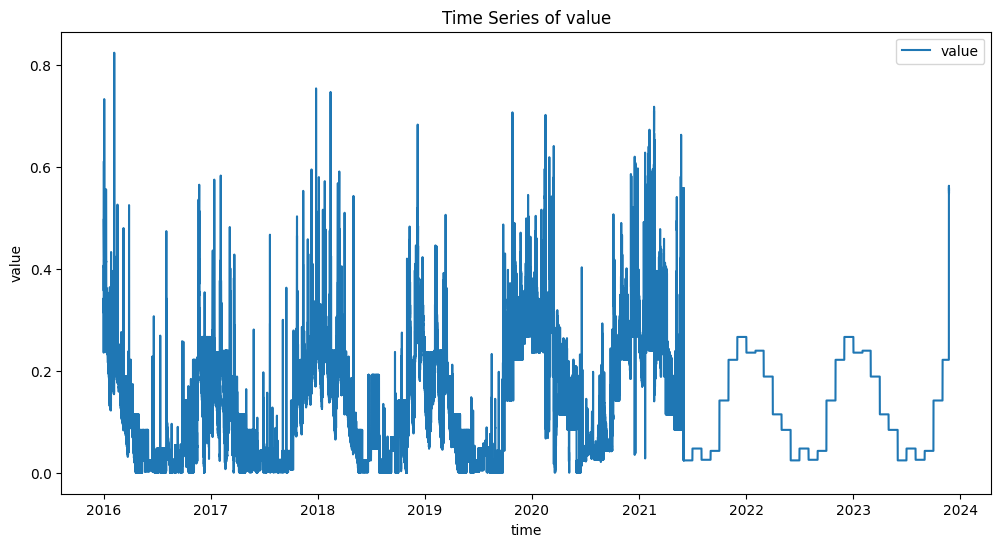

In [60]:
test_plot = test.reset_index()
plot_time_series(test_plot, variable='value')

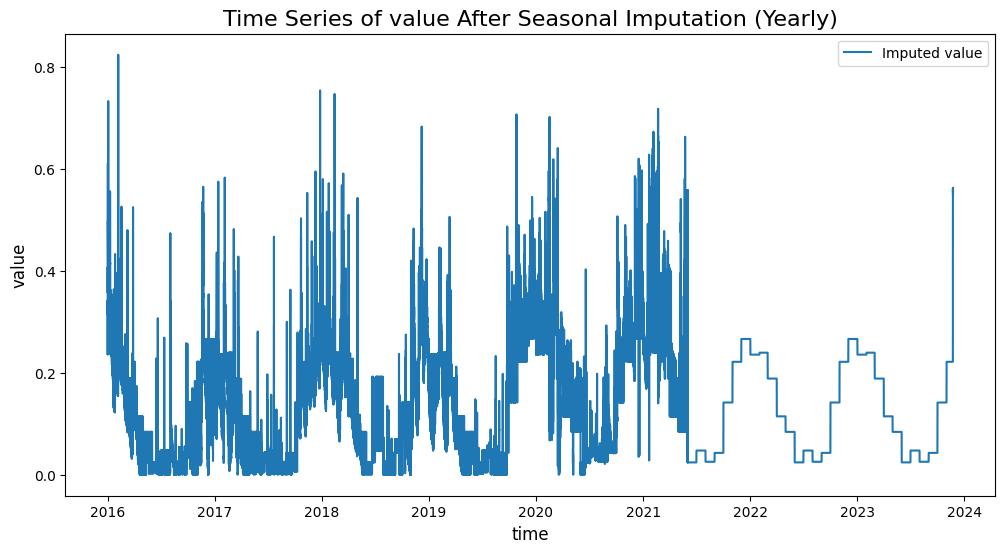

In [61]:
def seasonal_impute_yearly(df: pd.DataFrame, column: str = 'value') -> pd.DataFrame:
    """
    Impute missing values based on a yearly seasonal pattern at 15-minute frequency.

    Args:
        df (pd.DataFrame): DataFrame with a datetime index and a column to impute.
        column (str): Name of the column containing the values to impute.

    Returns:
        pd.DataFrame: DataFrame with missing values imputed.
    """
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")
    
    if df.index.freq is None:
        df = df.asfreq('15min')  # Ensure uniform frequency

    # Ensure data is sorted by time
    df.sort_index(inplace=True)

    # Calculate the seasonal mean for each time point in a year
    period = 96 * 365  # Number of 15-minute intervals in a year
    seasonal_pattern = (
        df[column]
        .dropna()
        .groupby(df.index.to_series().dt.dayofyear * 96 + df.index.to_series().dt.hour * 4 + df.index.to_series().dt.minute // 15)
        .mean()
    )

    # Define a function to impute missing values
    def impute(row):
        if pd.isna(row[column]):
            doy = row.name.dayofyear
            interval = row.name.hour * 4 + row.name.minute // 15
            seasonal_index = doy * 96 + interval
            return seasonal_pattern.get(seasonal_index, np.nan)
        return row[column]

    # Apply the seasonal imputation
    df[column] = df.apply(impute, axis=1)
    return df

# Apply the seasonal imputation
gauge_8256_15min_imputed = seasonal_impute_yearly(gauge_8256_15min, column='value')

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(gauge_8256_15min_imputed.index, gauge_8256_15min_imputed['value'], label='Imputed value')
plt.title("Time Series of value After Seasonal Imputation (Yearly)", fontsize=16)
plt.xlabel("time", fontsize=12)
plt.ylabel("value", fontsize=12)
plt.legend()
plt.show()


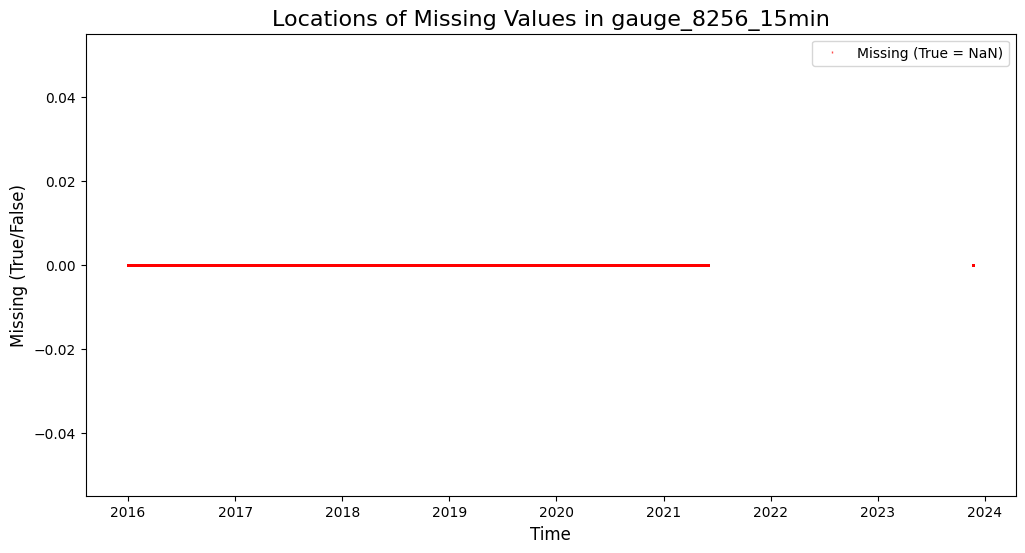

In [66]:
import matplotlib.pyplot as plt

# Count missing values by date
missing_values = gauge_8256_15min['value'].isna()

# Plot the locations of nulls
plt.figure(figsize=(12, 6))
plt.plot(
    gauge_8256_15min.index, 
    missing_values, 
    label="Missing (True = NaN)", 
    linestyle='none', 
    marker='|', 
    markersize=2, 
    color="red", 
    alpha=0.7
)
plt.title("Locations of Missing Values in gauge_8256_15min", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Missing (True/False)", fontsize=12)
plt.legend()
plt.show()


In [3]:
import os
import pandas as pd

def scan_missing_blocks(directory, column="value", freq="15min"):
    """
    Scan a directory of river gauge CSV files for consecutive missing blocks of time
    and generate a report.

    Args:
        directory (str): Path to the directory containing the CSV files.
        column (str): Name of the column to check for missing values.
        freq (str): Frequency for resampling the time series (default: '15min').

    Returns:
        pd.DataFrame: Report summarizing missing blocks for each file.
    """
    report = []

    for filename in os.listdir(directory):
        if filename.endswith("_raw.csv"):
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)

            # Ensure 'time' column is datetime and set as index
            df['time'] = pd.to_datetime(df['time'])
            df.set_index('time', inplace=True)

            # Resample to ensure uniform frequency and introduce NaNs for missing rows
            df = df.asfreq(freq)

            # Identify missing blocks
            missing = df[column].isna()
            missing_blocks = missing.ne(missing.shift()).cumsum()[missing]

            for block_id, block in missing_blocks.groupby(missing_blocks):
                start_time = block.index.min()
                end_time = block.index.max()
                duration = end_time - start_time

                report.append({
                    "Filename": filename,
                    "Start Time": start_time,
                    "End Time": end_time,
                    "Duration (days)": duration.total_seconds() / (60 * 60 * 24)
                })

    # Create a DataFrame from the report
    report_df = pd.DataFrame(report)
    return report_df





In [4]:
missing_data_report = scan_missing_blocks('data/river_data/highest_granularity')

In [1]:
missing_data_report

NameError: name 'missing_data_report' is not defined

In [75]:
missing_data_report.sort_values('Duration (days)', ascending=False).head(30)

,Filename,Start Time,End Time,Duration (days)
450004,station_8256_raw.csv,2021-06-02 04:15:00,2023-11-22 16:00:00,903.489583
379773,station_395_raw.csv,2021-05-19 16:00:00,2022-01-12 13:30:00,237.895833
36877,station_1340_raw.csv,2020-04-28 22:00:00,2020-09-22 09:30:00,146.479167
497704,station_8340_raw.csv,2019-05-10 10:30:00,2019-07-18 12:15:00,69.072917
343891,station_1339_raw.csv,2023-04-06 06:30:00,2023-05-15 10:15:00,39.156250
342726,station_1339_raw.csv,2022-09-22 13:15:00,2022-10-30 06:00:00,37.697917
342727,station_1339_raw.csv,2022-10-30 06:30:00,2022-12-06 01:15:00,36.781250
341874,station_1339_raw.csv,2021-08-28 06:15:00,2021-10-03 21:45:00,36.645833
396595,station_1352_raw.csv,2021-03-01 14:00:00,2021-03-30 11:30:00,28.895833
298764,station_14454_raw.csv,2023-09-08 06:15:00,2023-10-03 10:45:00,25.187500


In [9]:
import pandas as pd
import numpy as np
gauge_361 = pd.read_csv('data/river_data/highest_granularity_rnwi/station_361_raw.csv_rnwi.csv')
gauge_361['time'] = pd.to_datetime(gauge_361['time'])
gauge_361.set_index('time', inplace= True)
gauge_361

,value
time,
2016-01-01 00:00:00,3.919
2016-01-01 00:30:00,3.919
2016-01-01 00:45:00,3.918
2016-01-01 01:00:00,3.919
2016-01-01 01:15:00,3.918
...,...
2024-11-09 02:30:00,3.698
2024-11-09 02:45:00,3.697
2024-11-09 03:15:00,3.697


In [10]:
m = gauge_361['value'].mean()
s = gauge_361['value'].std()

# Create a boolean mask for values that are outside the specified threshold.
ridic_mask = (gauge_361['value'] > (m + 10 * s)) | (gauge_361['value'] < (m - 10 * s))

# Use the mask to filter the DataFrame
gauge_361.loc[ridic_mask]


,value
time,
2022-01-25 05:00:00,1345544.500
2024-07-23 17:00:00,1086440.875


In [42]:
gauge_361.loc['2022-05-20 10:45:00', 'value'] = np.nan

In [43]:
gauge_361.describe()

,value
count,240811.000000
mean,3.796129
std,0.287160
min,0.030000
25%,3.617000
50%,3.725000
75%,3.894000
max,5.483000


In [44]:
gauge_361_15min = gauge_361.asfreq('15min')
gauge_361_15min.isnull().sum()

value    69766
dtype: int64

In [45]:
gauge_361_15min_imputed = seasonal_impute(gauge_361_15min)

In [46]:
gauge_361_15min_imputed.describe()

,value
count,310577.000000
mean,3.778123
std,0.262458
min,0.030000
25%,3.627000
50%,3.712000
75%,3.873000
max,5.483000


In [47]:
gauge_361_15min_imputed.loc[gauge_361_15min_imputed['value'] == gauge_361_15min_imputed['value'].max()]

,value
time,
2021-02-02 11:30:00,5.483
2021-02-02 11:45:00,5.483


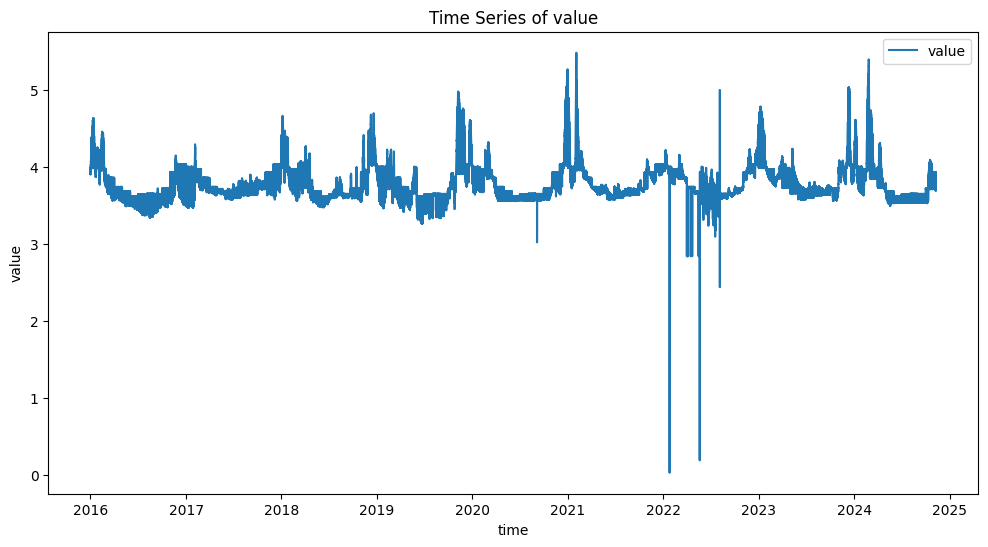

In [48]:
from src.data_visualisation import plot_time_series
gauge_361_15min_imputed_plot = gauge_361_15min_imputed.reset_index()
plot_time_series(gauge_361_15min_imputed_plot, variable='value')

In [51]:
m = gauge_361_15min_imputed['value'].mean()
s = gauge_361_15min_imputed['value'].std()

# Create a boolean mask for values that are outside the specified threshold.
ridic_mask = (gauge_361_15min_imputed['value'] < (m - 10 * s))

# Use the mask to filter the DataFrame
gauge_361_15min_imputed.loc[ridic_mask]


,value
time,
2022-01-25 04:15:00,0.030
2022-01-25 04:45:00,0.030
2022-05-20 10:30:00,0.580
2022-05-20 11:00:00,0.191


In [52]:
gauge_361_15min_imputed.loc[ridic_mask, 'value'] = np.nan
gauge_361_15min_imputed = seasonal_impute(gauge_361_15min_imputed)

In [5]:
gauge_361_15min_imputed_plot = gauge_361_15min_imputed.reset_index()
plot_time_series(gauge_361_15min_imputed_plot, variable='value')

NameError: name 'gauge_361_15min_imputed' is not defined

In [11]:
def process_river(df: pd.DataFrame) -> pd.DataFrame:
    """
    Takes in a river gauge time series with a time index. Returns a DataFrame 
    resulting from:
    - Replacing negative values with NaN
    - Removing outliers (values beyond mean ± 10*std) by setting them to NaN
    - Resampling to 15min frequency to reveal missing rows
    - Seasonally imputing missing values based on monthly-hourly averages
    """
    
    # Ensure the index is datetime
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    # Step 1: Remove negative values
    df = process_negative_river_levels(df)

    # Step 2: Remove extreme outliers
    mean = df['value'].mean()
    sd = df['value'].std()
    errors_condition = (df['value'] > mean + 10.0 * sd) | (df['value'] < mean - 10.0 * sd)
    df.loc[errors_condition, 'value'] = np.nan

    # Step 3: Resample to 15min intervals
    df_15min = df.asfreq('15min')

    # Check how many values are missing after resampling
    print('Number of missing values after resampling at 15min:\n', df_15min.isnull().sum())

    # Step 4: Seasonal imputation
    df_15min = seasonal_impute(df_15min, column='value')

    # Check how many values remain missing after imputation
    print('Number of missing values after seasonal impute:\n', df_15min['value'].isnull().sum())

    return df_15min
    

In [12]:
from src.data_preprocessing import process_negative_river_levels

In [13]:
tst_361 = process_river(gauge_361)

Number of missing values after resampling at 15min:
 value    69765
dtype: int64


NameError: name 'seasonal_impute' is not defined

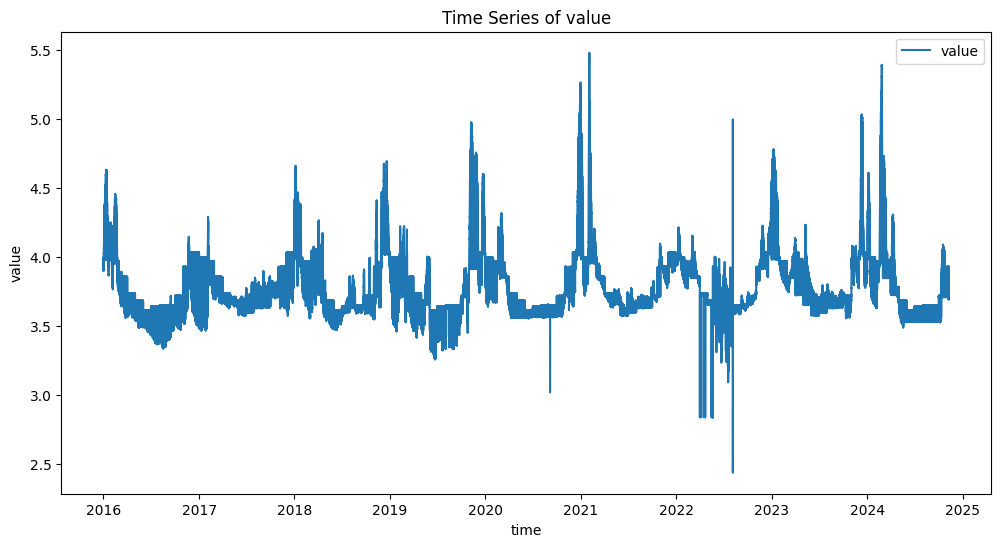

In [70]:
tst_361 = tst_361.reset_index()
plot_time_series(tst_361, variable='value')

In [77]:
import os
import pandas as pd  # Assuming you are using pandas for data manipulation

# Input and output directories
input_dir = 'data/river_data/highest_granularity'
output_dir = 'data/river_data/highest_granularity_processed'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Process each file in the input directory
for filename in os.listdir(input_dir):
    # Construct the full file path
    file_path = os.path.join(input_dir, filename)
    
    # Read the CSV file
    df = pd.read_csv(file_path)
    df['time'] = pd.to_datetime(df['time']) 
    df.set_index('time', inplace= True)

    
    # Process the DataFrame (replace `process_river` with your actual function)
    processed_df = process_river(df).reset_index()
    
    # Construct the output file path
    output_filename = f"{os.path.splitext(filename)[0]}_processed.csv"
    output_file_path = os.path.join(output_dir, output_filename)
    
    # Save the processed DataFrame to the output file path
    processed_df.to_csv(output_file_path, index=False)

    print(f"Processed and saved: {output_file_path}")


Number of missing values after resampling at 15min:
 value    81047
dtype: int64
Number of missing values after seasonal impute:
 0
Processed and saved: data/river_data/highest_granularity_processed/station_355_raw_processed.csv
Number of missing values after resampling at 15min:
 value    93302
dtype: int64
Number of missing values after seasonal impute:
 0
Processed and saved: data/river_data/highest_granularity_processed/station_1340_raw_processed.csv
Number of missing values after resampling at 15min:
 value    28912
dtype: int64
Number of missing values after seasonal impute:
 0
Processed and saved: data/river_data/highest_granularity_processed/station_387_raw_processed.csv
Number of missing values after resampling at 15min:
 value    69771
dtype: int64
Number of missing values after seasonal impute:
 0
Processed and saved: data/river_data/highest_granularity_processed/station_397_raw_processed.csv
Number of missing values after resampling at 15min:
 value    133051
dtype: int64
N

KeyError: 'time'

In [16]:
import pandas as pd
import numpy as np
gauge_397 = pd.read_csv('data/river_data/highest_granularity_rnwi/station_397_raw.csv_rnwi.csv')
gauge_397['time'] = pd.to_datetime(gauge_397['time'])
gauge_397.set_index('time', inplace= True)
gauge_397

,value
time,
2016-01-01 00:00:00,0.240
2016-01-01 00:30:00,0.240
2016-01-01 00:45:00,0.239
2016-01-01 01:15:00,0.239
2016-01-01 01:30:00,0.238
...,...
2024-11-09 04:45:00,0.136
2024-11-09 05:00:00,0.137
2024-11-09 05:30:00,0.137


In [17]:
tst_397 = process_river(gauge_397)
tst_397 = tst_397.reset_index()
plot_time_series(tst_397, variable='value', station_name='Station 361 (seasonally imputed missing rows)')

NameError: name 'process_river' is not defined

In [3]:
from src.data_visualisation import plot_time_series
import pandas as pd

In [4]:
interp_361 = pd.read_csv('data/river_data/highest_granularity/cleaned/station_397_cleaned.csv')

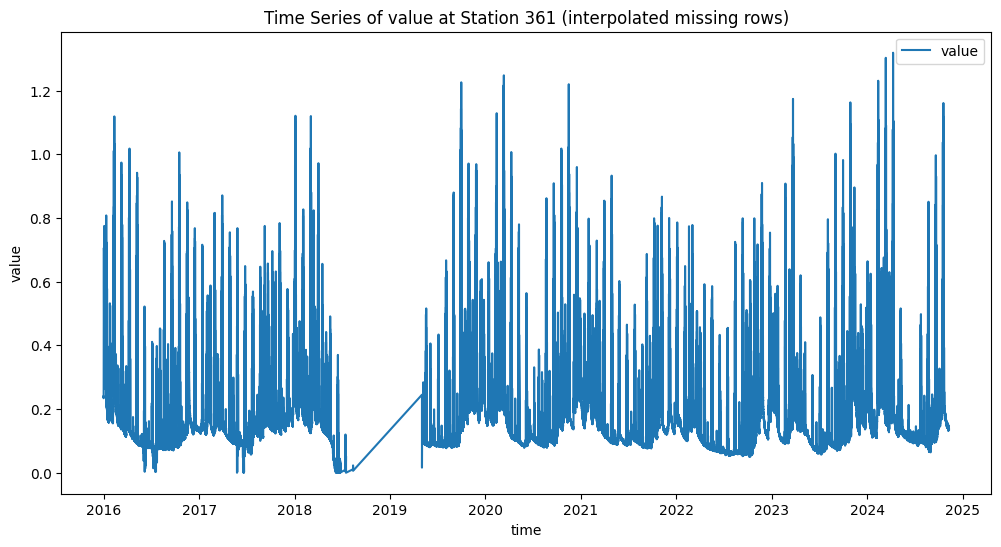

In [ ]:
interp_361.reset_index(inplace=True)
plot_time_series(interp_361, variable='value', station_name='Station 361 (interpolated missing rows)')